<a href="https://colab.research.google.com/github/Dethkalleon/MLKublik/blob/main/%D0%9A%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%95%D0%98_%D0%9C%D0%9B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛР 5.1 - Интеграция данных

### Цель работы

На практическом примере освоить основные этапы и приемы интеграции разных таблиц данных в единый датасет средствами Python и pandas для последующей подготовки к машинному обучению.


### Содержание работы

1. Прочитайте три однотипных файла с данными по обращениям клиентов в службу технической поддержки. Познакомьтесь со структурой этих трех таблиц и их особенностями.
2. Объедините три эти таблицы в один общий датасет с максимальным соблюдением внутренней согласованности данных.
3. Прочитайте датасет с данными заказов клиентов, присоедините максимальное количество данных из него к датасету, получившемуся на предыдущем шаге.
4. Прочитайте датасет с данными о менеджерах службы клиентской поддержки и также присоедините данные из него к общему датасету.


### Выполнение

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
data1 = pd.read_csv('issues1.csv', index_col=0)
data1.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5


1. Идентификатор обращения - это уникальная строка, по видимому, генерируемая случайно по алгоритму типа UUID.
2. Канал, по которому обращение поступило в систему. Здесь приводится название канала в текстовом виде.
3. Категория обращения - также дискретная переменная, один вариант из определенного набора.
4. Подкатегория обращения.
5. К обращению пользователи могут прилагать комментарии. В данном поле собраны эти комментарии в простом текстовом, необработанном виде.
6. Идентификатор заказа, по которому сделано обращение. Некоторые значения здесь отсутствуют, то есть обращение может быть связано с заказом, а может и нет.
7. Дата поступления обращения в систему. Здесь фиксируется дата и точное время.
8. Дата ответа на обращение сотрудника техподдержки. Также дата со временем.
9. Дата прохождения клиентом опроса об удовлетворенности работой технической поддержки.
10. Имя сотрудника, который работал с этим обращением.
11. Оценка, которую клиент поставил работе технической поддержки. Именно это и является целевой переменной в данном датасете.

In [ ]:
data2 = pd.read_csv('issues2.csv', index_col=0)
data2

,Id,channel_name,category,Sub-category,Order_id,Reported at,Responded at,Survey responded at,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,"21 08 2023, 09:01:00 PM","21 08 2023, 09:04:00 PM",21 08 2023,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,"18 08 2023, 09:20:00 PM","18 08 2023, 09:20:00 PM",18 08 2023,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,"24 08 2023, 09:57:00 PM","24 08 2023, 09:58:00 PM",24 08 2023,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,"28 08 2023, 11:38:00 PM","29 08 2023, 05:55:00 AM",29 08 2023,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,"30 08 2023, 11:03:00 AM","30 08 2023, 11:04:00 AM",30 08 2023,L. Beck,5
...,...,...,...,...,...,...,...,...,...,...
44334,0e5c4973-24bc-4d7d-9eb4-54c868721109,Inbound,Product Queries,Product Specific Information,74ca7f8d-9c52-4902-b981-6fb6a5932c72,"08 08 2023, 12:13:00 PM","08 08 2023, 06:44:00 PM",08 08 2023,J. Kelly,5
44335,2fb101c6-3f7d-46ea-a0cb-c6a7b085d1d1,Inbound,Shopzilla Related,General Enquiry,7cc638a3-6273-4e2a-86ea-60436df6c0b9,"22 08 2023, 07:37:00 PM","22 08 2023, 08:21:00 PM",22 08 2023,S. Nelson,5
44336,cbb0d288-a7d7-40b8-a52a-2896ba4d7ce2,Inbound,Returns,Return request,af616b51-6739-48cd-a8f5-4f04b5eb8f79,"08 12 2023, 04:39:00 PM","12 08 2023, 04:43:00 PM",12 08 2023,D. Terry,5
44337,8de9d211-cf76-4447-962c-0517b922b548,Inbound,Returns,Service Centres Related,95de5b8a-145e-4282-a631-ddec3017d912,"27 08 2023, 08:19:00 AM","27 08 2023, 08:21:00 AM",27 08 2023,G. Jones,5


Из явно бросающихся в глаза отличий, мы видим отсутствие во втором файле информации о тексте комментария. Очень часто бывает, что в разных датасетах описаны разные характеристики объектов. Может быть, что второй файл поступил их другой системы, где текстовые комментарии просто не собираются или не учитываются. Либо наоборот, обращения без комментариев попали в системе распределения данных в другую таблицу. Спойлер - у нас именно второй случай.

Еще заметим, что некоторые колонки во втором файле называются немного по-другому. Это нам еще будет важно дальше.

Дальше точно также познакомимся с третьей таблицей данных:

In [ ]:
data3 = pd.read_csv('issues4.csv', index_col=0)
data3.head()

,Unique id,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Agent,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,"August 27, 2023, 08:28:00 AM","August 27, 2023, 08:29:00 AM","August 27, 2023, 12:00:00 AM",Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,"December 08, 2023, 03:04:00 PM","August 12, 2023, 03:19:00 PM","August 12, 2023, 12:00:00 AM",Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,"August 13, 2023, 12:45:00 PM","August 13, 2023, 01:02:00 PM","August 13, 2023, 12:00:00 AM",Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,"June 08, 2023, 06:07:00 PM","August 06, 2023, 06:08:00 PM","August 06, 2023, 12:00:00 AM",Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,"April 08, 2023, 10:05:00 PM","August 04, 2023, 10:08:00 PM","August 04, 2023, 12:00:00 AM",Kristin Adams,5


Здесь содержится меньше всего - 13 тысяч обращений. И меньше всего колонок - мы не видим ни текста обращения, ни связанного идентификатора заказа.

Еще можно обратить внимание на другой формат дат (хотя во всех трех файлах он разный), и на полное указание имени оператора техподдержки. В двух предыдущих файлах имя оператора указывалось инициалом.

In [ ]:
data1.shape, data2.shape, data3.shape

((28425, 11), (44339, 10), (13143, 9))

Вертикальная интеграция данных

Важно любую интеграцию данных проводить последовательно, не стараясь ускорить процесс массовым объединением многих таблиц. Начнем с объединения первой и второй таблицы. Вертикальное объединение осуществляется простой конкатенацией датасетов. Но если мы проведем конкатенацию сразу, вот так, мы получим не тот результат, который нужно:



In [ ]:
pd.concat([data1, data2]).head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,channel_name,Reported at,Responded at,Survey responded at
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,04/08/2023 19:10,04/08/2023 19:13,04-Aug-23,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,18/08/2023 09:11,18/08/2023 09:18,18-Aug-23,M. Wilson,4,NaN,NaN,NaN,NaN
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,22/08/2023 07:15,22/08/2023 08:15,22-Aug-23,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,14/08/2023 09:21,14/08/2023 09:27,14-Aug-23,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,03/08/2023 08:18,03/08/2023 08:23,03-Aug-23,S. Taylor,5,NaN,NaN,NaN,NaN


Здесь мы видим, что из-за разности наименования столбцов у нас получилось дублирование: столбцы из второй таблицы не стали продолжением столбцов из первой, а просто добавились в качестве новых. При этом по строкам из первой таблицы в этих столбцах автоматически проставлены пропуски. Такую ситуацию можно сразу отследить по количеству столбцов в итоговом датафрейме. Их должно было быть 11, а стало 16 - явно что-то пошло не так.

Выведем названия столбцов в первой и второй таблице:

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    28425 non-null  object
 1   Channel               28425 non-null  object
 2   category              28425 non-null  object
 3   Sub-category          28425 non-null  object
 4   Customer Remarks      28425 non-null  object
 5   Order_id              22389 non-null  object
 6   Issue_reported_Date   28425 non-null  object
 7   Issue_responded_Date  28425 non-null  object
 8   Survey_response_Date  28425 non-null  object
 9   Agent_name            28425 non-null  object
 10  CSAT Score            28425 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.6+ MB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   44339 non-null  object
 1   channel_name         44339 non-null  object
 2   category             44339 non-null  object
 3   Sub-category         44339 non-null  object
 4   Order_id             44272 non-null  object
 5   Reported at          44339 non-null  object
 6   Responded at         44339 non-null  object
 7   Survey responded at  44339 non-null  object
 8   Agent_name           44339 non-null  object
 9   CSAT Score           44339 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 4.7+ MB


Отсюда можно построить схему переименования колонок так, чтобы в обеих таблицах одинаковые по смыслу колонки назывались в точности идентично, например так:

In [ ]:
data2 = data2.rename(columns={
    'channel_name': 'Channel',
    'Reported at': 'Issue_reported_Date',
    'Responded at': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
})

data2.head()

,Id,Channel,category,Sub-category,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,"21 08 2023, 09:01:00 PM","21 08 2023, 09:04:00 PM",21 08 2023,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,"18 08 2023, 09:20:00 PM","18 08 2023, 09:20:00 PM",18 08 2023,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,"24 08 2023, 09:57:00 PM","24 08 2023, 09:58:00 PM",24 08 2023,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,"28 08 2023, 11:38:00 PM","29 08 2023, 05:55:00 AM",29 08 2023,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,"30 08 2023, 11:03:00 AM","30 08 2023, 11:04:00 AM",30 08 2023,L. Beck,5


Но на этом проблемы интеграции не заканчиваются. Еще важно следить за тем, чтобы в обеих таблицах были абсолютно одинаковые форматы. Лучший способ этого добиться - перевести все даты во внутренний формат pandas - datetime. Для этого текстовое представление дат нужно распарсить. Обычно, метод to_datetime хорошо справляется с этим автоматически, но иногда приходится указывать конкретный формат даты:

In [ ]:
data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])
data2['Survey_response_Date'] = pd.to_datetime(data2['Survey_response_Date'], format='%d %m %Y')

<ipython-input-13-a5e2289ea512>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_reported_Date'] = pd.to_datetime(data2['Issue_reported_Date'])
<ipython-input-13-a5e2289ea512>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2['Issue_responded_Date'] = pd.to_datetime(data2['Issue_responded_Date'])


После выполнения этих манипуляций сигнатура второй таблицы (набор названий колонок) полностью соответствует первой:

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44339 entries, 0 to 44338
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    44339 non-null  object        
 1   Channel               44339 non-null  object        
 2   category              44339 non-null  object        
 3   Sub-category          44339 non-null  object        
 4   Order_id              44272 non-null  object        
 5   Issue_reported_Date   44339 non-null  datetime64[ns]
 6   Issue_responded_Date  44339 non-null  datetime64[ns]
 7   Survey_response_Date  44339 non-null  datetime64[ns]
 8   Agent_name            44339 non-null  object        
 9   CSAT Score            44339 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 4.7+ MB


In [ ]:
data2.head()

,Id,Channel,category,Sub-category,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,6ba211fe-7643-4998-a7f7-cf34e5a4322c,Inbound,Order Related,Delayed,2dab4a7a-baf0-49f9-9d84-c8acdb4a11db,2023-08-21 21:01:00,2023-08-21 21:04:00,2023-08-21,A. Rodriguez,5
1,acef2550-cdd7-4e6a-b5b8-6d9627da9549,Inbound,Cancellation,Not Needed,5993a1f0-570d-4c82-95d9-6cc56c78043e,2023-08-18 21:20:00,2023-08-18 21:20:00,2023-08-18,R. Lee,5
2,46d012ec-cb21-40ce-afe1-5fe78905250a,Inbound,Returns,Return request,b64f579f-d913-4e85-978f-d0f6de902c3f,2023-08-24 21:57:00,2023-08-24 21:58:00,2023-08-24,S. Douglas,5
3,1671c7fa-e527-4a05-8f1f-9a865dad9778,Outcall,Cancellation,Not Needed,b754581f-a2a4-4ef2-abb1-aca09ac1a89c,2023-08-28 23:38:00,2023-08-29 05:55:00,2023-08-29,T. Adams,5
4,6e1923bd-de16-462b-a3ec-c60fb0ffe194,Inbound,Refund Related,Refund Enquiry,a1c40c79-e7a6-4faa-b948-0a32c3e3576a,2023-08-30 11:03:00,2023-08-30 11:04:00,2023-08-30,L. Beck,5


В первой таблице также надо преобразовать даты в нужный формат:

In [ ]:
data1['Issue_reported_Date'] = pd.to_datetime(data1['Issue_reported_Date'], format="%d/%m/%Y %H:%M")
data1['Issue_responded_Date'] = pd.to_datetime(data1['Issue_responded_Date'], format="%d/%m/%Y %H:%M")
data1['Survey_response_Date'] = pd.to_datetime(data1['Survey_response_Date'], format='%d-%b-%y')

Конечно, мы пропускаем множество шагов, необходимых для полного исключения возможных ошибок в интеграции. Например, нужно убедиться, что по всем остальным колонкам соблюдаются общие соглашения и обозначения. Например, в категориальных атрибутах таких как название канала, мы не уверены в соответствии названий, которые есть в первой таблице, названиям во второй. По хорошему, надо проверять все значения категориальных колонок по смыслу. И конечно, это невозможно правильно сделать без глубокого понимания предметной области.

Чаще всего, интеграция разных таблиц требует именно взаимной подгонки, то есть преобразования и в первой и во второй части. Убедимся, что сигнатура первой таблицы соответствует:



In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28425 entries, 0 to 28424
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    28425 non-null  object        
 1   Channel               28425 non-null  object        
 2   category              28425 non-null  object        
 3   Sub-category          28425 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              22389 non-null  object        
 6   Issue_reported_Date   28425 non-null  datetime64[ns]
 7   Issue_responded_Date  28425 non-null  datetime64[ns]
 8   Survey_response_Date  28425 non-null  datetime64[ns]
 9   Agent_name            28425 non-null  object        
 10  CSAT Score            28425 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 3.6+ MB


In [ ]:
data_12 = pd.concat([data1, data2])
data_12.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5


Отдельно проверим, что не появилось никаких лишних колонок:



In [ ]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72764 entries, 0 to 44338
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    72764 non-null  object        
 1   Channel               72764 non-null  object        
 2   category              72764 non-null  object        
 3   Sub-category          72764 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   72764 non-null  datetime64[ns]
 7   Issue_responded_Date  72764 non-null  datetime64[ns]
 8   Survey_response_Date  72764 non-null  datetime64[ns]
 9   Agent_name            72764 non-null  object        
 10  CSAT Score            72764 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 6.7+ MB


После этого можно попробовать присоединить и третью часть. Также выведем основную информацию по колонкам третьей таблицы:



In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             13143 non-null  object
 1   channel_name          13143 non-null  object
 2   category              13143 non-null  object
 3   Sub-category          13143 non-null  object
 4   Issue_reported at     13143 non-null  object
 5   issue_responded       13143 non-null  object
 6   Survey_response_Date  13143 non-null  object
 7   Agent                 13143 non-null  object
 8   CSAT Score            13143 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.5+ MB


Также, как и на предыдущем шаге, колонки требуют переименования:

In [ ]:
data3 = data3.rename(columns={
    'Unique id': 'Id',
    'channel_name': 'Channel',
    'Issue_reported at': 'Issue_reported_Date',
    'issue_responded': 'Issue_responded_Date',
    'Survey responded at': 'Survey_response_Date',
    'Agent': 'Agent_name'
})

Парсим даты

In [ ]:
data3['Issue_reported_Date'] = pd.to_datetime(data3['Issue_reported_Date'])
data3['Issue_responded_Date'] = pd.to_datetime(data3['Issue_responded_Date'])
data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])

<ipython-input-22-a84f6c2ad651>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data3['Survey_response_Date'] = pd.to_datetime(data3['Survey_response_Date'])


In [ ]:
data3.head()

,Id,Channel,category,Sub-category,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,3350ccee-ead7-40fa-80c6-cc7b5e6e345a,Inbound,Returns,Reverse Pickup Enquiry,2023-08-27 08:28:00,2023-08-27 08:29:00,2023-08-27,Terry Young,5
1,4a88df6e-aafb-477a-bd8e-63ffc34c1a43,Inbound,Returns,Wrong,2023-12-08 15:04:00,2023-08-12 15:19:00,2023-08-12,Brenda Cox,4
2,7b5dbea2-2370-490a-8fef-4c5f7c52a4cc,Inbound,Returns,Reverse Pickup Enquiry,2023-08-13 12:45:00,2023-08-13 13:02:00,2023-08-13,Brian Mcguire,5
3,c6d4401e-a4ef-4de0-af68-a8755b928f5f,Inbound,Refund Related,Refund Enquiry,2023-06-08 18:07:00,2023-08-06 18:08:00,2023-08-06,Dr. Heather Lewis,5
4,423bd17e-e944-4f6e-beff-9c97fa325d9e,Inbound,Returns,Reverse Pickup Enquiry,2023-04-08 22:05:00,2023-08-04 22:08:00,2023-08-04,Kristin Adams,5


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13143 entries, 0 to 13142
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    13143 non-null  object        
 1   Channel               13143 non-null  object        
 2   category              13143 non-null  object        
 3   Sub-category          13143 non-null  object        
 4   Issue_reported_Date   13143 non-null  datetime64[ns]
 5   Issue_responded_Date  13143 non-null  datetime64[ns]
 6   Survey_response_Date  13143 non-null  datetime64[ns]
 7   Agent_name            13143 non-null  object        
 8   CSAT Score            13143 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
data_123 = pd.concat([data_12, data3])
data_123.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5


Здесь можно заметить одну ошибку, которую мы пропустили. Обратим внимание на значения в колонке "Agent_name":

In [ ]:
data_123.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85907 entries, 0 to 13142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    85907 non-null  object        
 1   Channel               85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   85907 non-null  datetime64[ns]
 7   Issue_responded_Date  85907 non-null  datetime64[ns]
 8   Survey_response_Date  85907 non-null  datetime64[ns]
 9   Agent_name            85907 non-null  object        
 10  CSAT Score            85907 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 7.9+ MB


В первых двух таблицах у нас имя оператора обозначено инициалом, а в третьей - полным именем. Необходимо привести все данные к единому соглашению. Здесь нужно приводить к форме с инициалом, потому что полное имя мы можем сократить до инициала, а только по инициалу восстановить полное имя нельзя. Напишем процедуру, которая преобразует строку нужным нам образом и применим ее ко всей колонке в третьей таблице.

In [ ]:
data3['Agent_name'] = data3['Agent_name'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

data3['Agent_name']

,Agent_name
0,T. Young
1,B. Cox
2,B. Mcguire
3,D. Heather
4,K. Adams
...,...
13138,K. Schultz
13139,B. Frost
13140,D. Wright
13141,M. Edwards


In [ ]:
data_123 = pd.concat([data_12, data3])

Таким образом мы правильно провели вертикальное объединение трех таблиц, содержащих информацию о разных объектах в единый датасет. В реальном примере нужно еще более тщательно подходить к проверке внутренней согласованности значений в таблицах, желательно при этом выводить статистическую информацию по столбцам в каждой таблице, можно строить графики плотности распределения, гистограммы. А после объединения - обязательно проверить, не получилось ли в итоговой таблице дубликатов - нескольких записей по одному и тому же объекту.

Добавление данных заказа

Итак, у нас собраны в одной таблице данные по всем имеющимся обращениям клиентов в техподдержку. Мы могли заметить, что среди полей в этой таблице есть идентификатор заказа. Информация по заказам хранится в отдельной таблице. Прочитаем ее и выведем на экран первые строки:

In [ ]:
orders_data = pd.read_csv('orders.csv', index_col=0)
orders_data.head()

,Id,order_date_time,Customer_City,Product_category,Item_price
0,53465d50-a568-48a9-b96e-ee2a0524fee8,14/08/2023 18:54,NEW DELHI,Books & General merchandise,144.0
1,57d64c28-e3dc-49bd-8e8a-8e24572c6b59,30/07/2023 21:43,HAJIPUR,Home,445.0
2,55d4e1bb-e148-437f-aa83-3bfbae939155,10/07/2023 21:20,HYDERABAD,LifeStyle,399.0
3,509803e9-4c15-4db4-bbe7-fc1e12b6c6cc,08/08/2023 16:40,JASPUR,Mobile,32999.0
4,5cfbe41f-ffcc-4fcf-8520-94bb61dee14e,07/08/2023 08:29,JHAJJAR,Electronics,1499.0


Первый же столбец - это идентификатор заказа, который должен совпадать с идентификатором с общей таблице. Для проведение соединения таблиц в pandas необязательно, но очень облегчает процедуру, если соответствующие столбцы таблиц назывались одинаково. Поэтому переименуем столбец в данной таблице так, чтобы он назывался как в основной:

In [ ]:
orders_data = orders_data.rename(columns={
    'Id': 'Order_id',
})

Теперь можно провести соединение. Для этого выделим ключевой столбец - тот, по которому будет проводиться сопоставление записей. Самое важное - выбрать тип соединения. В данном случае, нам нужно выбрать все записи из первой (левой) таблицы и присоединить к ним соответствующие столбцы из второй (правой) таблицы. Значит, нужно использовать левое внешнее соединение:



In [ ]:
data_with_orders = data_123.merge(orders_data, on='Order_id', how='left')
data_with_orders.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN


При внимательном рассмотрении данной таблицы можно заметить, что для многих строк в новых столбцах стоят пропуски, то есть отсутствие значения.

Можно подумать, что соединение прошло не так, как мы предполагали. Можно вручную проверить некоторые значения. Для этого подставим идентификатор заказа, по которому нет данных в итоговой таблице в таблицу заказов

In [ ]:
orders_data[orders_data.Order_id == 'a5464619-b2d8-49de-9346-5e5db0972756']

,Order_id,order_date_time,Customer_City,Product_category,Item_price


Мы видим, что действительно по данному идентификатору в таблице заказов нет ни одной записи.

Значит, соединение прошло правильно, просто в таблице аказов есть информация не про каждый заказ, упомянутый в основной таблице. Оценить масштаб пропусков в данных можно с помощью визуализации отсутствующих значений:

<Axes: >

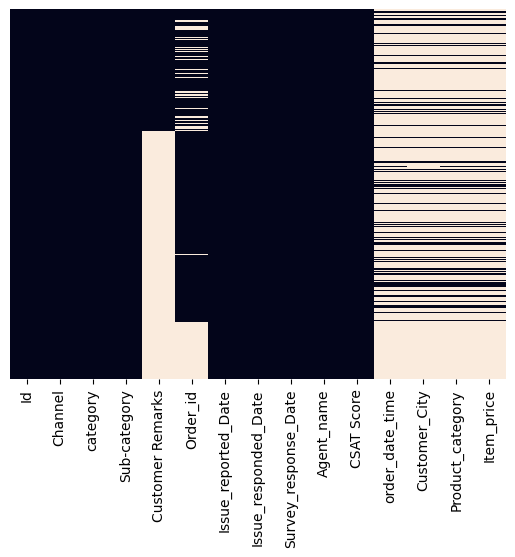

In [ ]:
sns.heatmap(data_with_orders.isnull(), yticklabels=False, cbar=False)

На данном графике видны, в частности, пропущенные значения в столбцах с комментарием пользователя и идентификатором заказа, которые появились после вертикальной интеграции первых трех таблиц. А по данным заказа мы видим большое количество пропусков. Но там, где нет идентификатора заказа, нет и никакой информации про сам заказ, что логично.

На последующих шагах анализа и очистки данных потребуется избавится от этих пропусков. Вполне возможно,что целесообразнее изначально не присоединять эту таблицу, так как она содержит информацию только о малой части заказов. Но эти решения мы будем обсуждать позже. Сейчас наша задача в том, чтобы объединить в одну таблицу максимальное количество данных.



Добавление данных менеджеров

Перейдем к последней таблице нашего набора - данным об операторах технической поддержки. Как всегда первым делом прочтем и выведем таблицу:



In [ ]:
agent_data = pd.read_csv("agents.csv", index_col=0)
agent_data.head()

,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening
1,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning
2,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning
3,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
4,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning


В этой таблице собрана информация о более чем 1300 работниках технической поддержки, которые обрабатывают обращения клиентов. У каждого оператора есть руководитель и менеджер, а также тип контракта и вид смены. В нашей основной таблице есть поле с именем оператора. Похоже, что именно по нему и надо будет проводить соединение. Но для начала нужно убедиться, что в этой новой таблице имя оператора уникальное. Для этого проведем группировку по имени оператора и выведем количество значений по остальным столбцам:

In [ ]:
agent_data.groupby(['Agent']).agg('count').head(20)

,Supervisor,Manager,Tenure Bucket,Shift
Agent,,,,
Aaron Edwards,1,1,1,1
Aaron Romero,1,1,1,1
Abigail Gonzalez,1,1,1,1
Adam Barnett,1,1,1,1
Adam Hammond,1,1,1,1
Adam Henderson,1,1,1,1
Adam Hernandez,1,1,1,1
Adam Schwartz,1,1,1,1
Adam Torres,1,1,1,1


Видно, что каждому имени оператора соответствует только одно значение по всем другим столбцам.

Однако, в нашей основной таблице операторы названы через инициалы. Давайте в этой таблице также приведем имя оператора к нужной форме:

In [ ]:
agent_data['Agent_name'] = agent_data['Agent'].apply(
    lambda x: x.split()[0][0] + ". " + x.split()[1] if isinstance(x, str) else np.NAN
)

Теперь надо сравнить имена операторов в этой и основной таблице. Опять воспользуемся группировкой:

In [ ]:
agent_data.groupby(['Agent_name']).agg('first').head(20)

,Agent,Supervisor,Manager,Tenure Bucket,Shift
Agent_name,,,,,
A. Adams,Adriana Adams,Sophia Sato,John Smith,0-30,Morning
A. Aguilar,Andrew Aguilar,Nathan Patel,Emily Chen,On Job Training,Evening
A. Barnett,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning
A. Barrett,Andrew Barrett,Elijah Yamaguchi,John Smith,>90,Evening
A. Barron,Alexandra Barron,Austin Johnson,Jennifer Nguyen,On Job Training,Evening
A. Beck,Andrea Beck,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening
A. Bell,Amy Bell,Wyatt Kim,Jennifer Nguyen,On Job Training,Evening
A. Benjamin,Amanda Benjamin,Amelia Tanaka,Emily Chen,>90,Morning
A. Berry,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening


А вот такая же группировка по основной таблице:

In [ ]:
data_123.groupby(['Agent_name']).agg('count').head(20)

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,CSAT Score
Agent_name,,,,,,,,,,
A. Adams,215,215,215,215,70,175,215,215,215,215
A. Aguilar,31,31,31,31,11,19,31,31,31,31
A. Barnett,56,56,56,56,22,41,56,56,56,56
A. Barrett,50,50,50,50,16,35,50,50,50,50
A. Barron,25,25,25,25,9,18,25,25,25,25
A. Beck,70,70,70,70,17,51,70,70,70,70
A. Bell,20,20,20,20,10,18,20,20,20,20
A. Benjamin,64,64,64,64,22,48,64,64,64,64
A. Berry,135,135,135,135,62,89,135,135,135,135


Теперь можно приступать к соединению. Воспользуемся функцией join:

In [ ]:
data_with_agents = data_with_orders.join(agent_data, rsuffix='_1', how='left')
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,...,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name_1
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,...,NaN,NaN,NaN,NaN,Aaron Edwards,Mia Patel,Emily Chen,61-90,Evening,A. Edwards
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,...,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Aaron Romero,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,A. Romero
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,...,NaN,NaN,NaN,NaN,Abigail Gonzalez,Jacob Sato,Jennifer Nguyen,On Job Training,Morning,A. Gonzalez
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,...,NaN,NaN,NaN,NaN,Adam Barnett,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning,A. Barnett
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,...,NaN,NaN,NaN,NaN,Adam Hammond,Olivia Suzuki,John Smith,31-60,Morning,A. Hammond


При анализе первых строк датасета проблемы не видно, но давайте изобразим на графике пропущенные значения:



<Axes: >

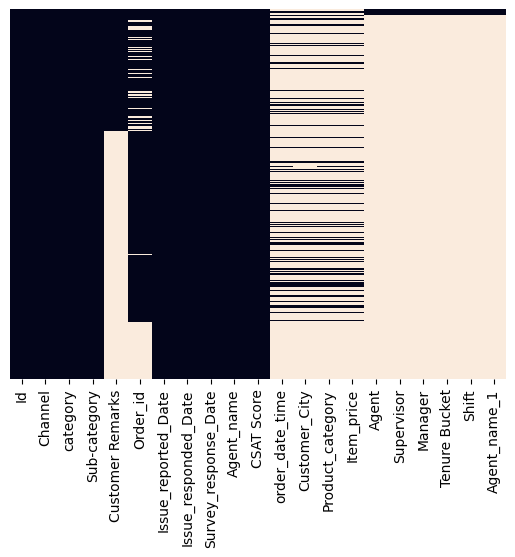

In [ ]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

Здесь мы видим явно аномальную картину.

Дело в том, что функция join по умолчанию проводит соединение по индексу двух датафреймов в качестве ключа. То есть в нашем случае, по номеру строки. Нам же нужно указать название определенного столбца. Для такого режима соединения больше подходит функция merge:

In [ ]:
data_with_agents = data_with_orders.merge(agent_data, how='left', on='Agent_name', copy=False)
data_with_agents.head()

,Id,Channel,category,Sub-category,Customer Remarks,Order_id,Issue_reported_Date,Issue_responded_Date,Survey_response_Date,Agent_name,CSAT Score,order_date_time,Customer_City,Product_category,Item_price,Agent,Supervisor,Manager,Tenure Bucket,Shift
0,8c910188-c387-4a1b-8d90-24379ec8c047,Inbound,Returns,Reverse Pickup Enquiry,Very happy,NaN,2023-08-04 19:10:00,2023-08-04 19:13:00,2023-08-04,J. Blackwell,1,NaN,NaN,NaN,NaN,James Blackwell,Jackson Park,William Kim,On Job Training,Evening
1,99d5ee06-8d2a-4754-bd17-ed235c70bf33,Inbound,Returns,Return request,Thoda jalfi replacement approve kijiye mera,89e6448f-9a48-4892-a09c-b47e0d8a87fe,2023-08-18 09:11:00,2023-08-18 09:18:00,2023-08-18,M. Wilson,4,14/08/2023 00:42,NAYAGARH,Electronics,1499.0,Mark Wilson,Scarlett Chen,John Smith,0-30,Morning
2,336020c5-dc97-488f-8f16-ed33ed04e5fc,Inbound,Returns,Damaged,Technician not visit the RO and without visit ...,15476f9a-35cc-4f33-ae33-8d9cd6ecb1a6,2023-08-22 07:15:00,2023-08-22 08:15:00,2023-08-22,A. Smith,5,NaN,NaN,NaN,NaN,Anthony Smith,Mia Patel,John Smith,>90,Morning
3,22c5643c-3d54-487c-8863-c57e198a70be,Inbound,Returns,Fraudulent User,madam ne mera problem solve kar Diya hai . t...,NaN,2023-08-14 09:21:00,2023-08-14 09:27:00,2023-08-14,A. Berry,5,NaN,NaN,NaN,NaN,Amy Berry,Elijah Yamaguchi,John Smith,>90,Evening
4,abd330a8-f3e2-4b7a-b14a-4ed35c4ec023,Inbound,Returns,Fraudulent User,Gjjjzjxgxteuhxgxe5xhxh,NaN,2023-08-03 08:18:00,2023-08-03 08:23:00,2023-08-03,S. Taylor,5,NaN,NaN,NaN,NaN,Sarah Taylor,Carter Park,Jennifer Nguyen,On Job Training,Morning


<Axes: >

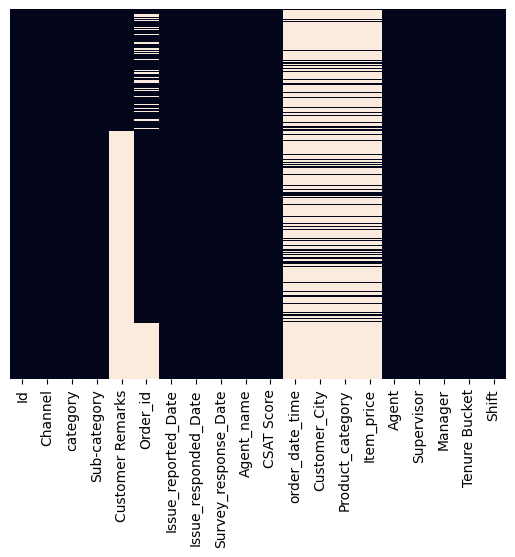

In [ ]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

Однако, если отследить формы датасетов, можно заметить что в итоге получилось сильно больше строк, чем было в левой таблице. При проведении левого соединения такое может случиться только если в правой таблице есть несколько записей, соответствующих по ключу одной записи в левой таблице. Давайте проверим уникальность ключа в правой таблице:



In [ ]:
agent_data.Agent_name.value_counts()

,count
Agent_name,
J. Moore,6
M. Smith,4
A. Brown,4
J. Williams,4
K. Martin,4
...,...
A. Sweeney,1
A. Thornton,1
A. Marshall,1


Одному и тому же инициалу может соответствовать несколько разных полных имен:



In [ ]:
agent_data[agent_data.Agent_name == 'J. Moore']

,Agent,Supervisor,Manager,Tenure Bucket,Shift,Agent_name
468,Jacob Moore,Ava Wong,Jennifer Nguyen,On Job Training,Morning,J. Moore
529,Jenna Moore,Aiden Patel,John Smith,>90,Morning,J. Moore
542,Jennifer Moore,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,J. Moore
612,Jon Moore,Ava Wong,William Kim,On Job Training,Evening,J. Moore
617,Jonathan Moore,Zoe Yamamoto,John Smith,>90,Morning,J. Moore
654,Juan Moore,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,J. Moore


Что же делать в такой ситуации? Давайте посмотрим, какое количество записей в правой таблице соответствует каждой строке в левой. Для этого соединим левую таблицу со сверткой правой таблицы по именам:

In [ ]:
data_with_agent_numbers = data_with_orders.merge(agent_data.Agent_name.value_counts(), how='left', left_on='Agent_name', right_index=True)
data_with_agent_numbers
data_with_agent_numbers = data_with_agent_numbers.rename(columns={
    "count": "Agent_name_y",
    "Agent_name": "Agent_name_x"
})

data_with_agent_numbers.Agent_name_y.value_counts()

,count
Agent_name_y,
1,68749
2,11326
3,3695
4,1843
6,294


Мы видим, что все же абсолютному большинству строк основной таблицы соответствует единственная запись в таблице операторов. То есть дублирование строк - это скорее исключение. Поэтому мы можем добавить в датасет информацию об операторах в том случае, если сопоставление однозначное. А для остальных записей, которым соответствует несколько возможных имен, будут стоять пропуски. Как и положено в случае неопределенности данных.

Для этого удалим данные об имени оператора у тех строк, где соответствие множественное:



In [ ]:
data_with_agent_numbers['Agent_name_x'] = data_with_agent_numbers.Agent_name_x.where(
    data_with_agent_numbers['Agent_name_y'] == 1.0, np.nan
)

In [ ]:
data_with_agents = data_with_agent_numbers.merge(agent_data, how='left', left_on='Agent_name_x', right_on="Agent_name")
data_with_agents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    85907 non-null  object        
 1   Channel               85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Customer Remarks      28425 non-null  object        
 5   Order_id              66661 non-null  object        
 6   Issue_reported_Date   85907 non-null  datetime64[ns]
 7   Issue_responded_Date  85907 non-null  datetime64[ns]
 8   Survey_response_Date  85907 non-null  datetime64[ns]
 9   Agent_name_x          68749 non-null  object        
 10  CSAT Score            85907 non-null  int64         
 11  order_date_time       16951 non-null  object        
 12  Customer_City         16817 non-null  object        
 13  Product_category

Осталось удалить лишние столбцы, которые мы вводили в таблицу для проведения служебных операций:



In [ ]:
data_with_agents = data_with_agents.drop(['Agent_name_x', 'Agent_name_y', 'Agent_name'], axis=1)

<Axes: >

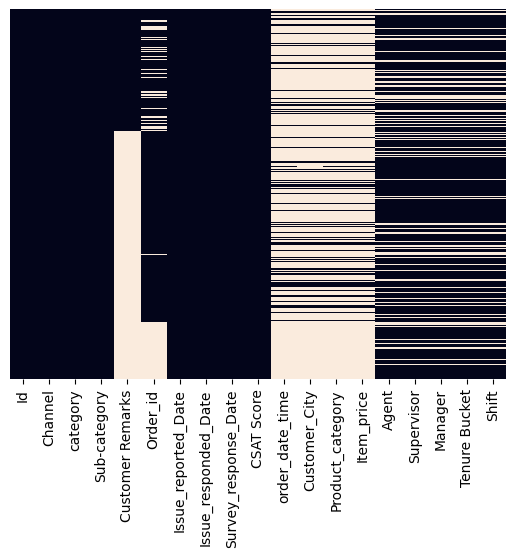

In [ ]:
sns.heatmap(data_with_agents.isnull(), yticklabels=False, cbar=False)

### Задания для самостоятельного выполнения

#### Задание 1
При выполнении вертикального объединения убедитесь в отсутствии дубликатов данных.

In [ ]:
data_123['Id'].duplicated().any()

np.False_

#### Задание 2
При горизонтальной интеграции первой и второй таблицы выведите по каждому столбцу гистограмму распределения или плотность распределения, чтобы убедиться, что признаки выражаются по соотносимым шкалам.


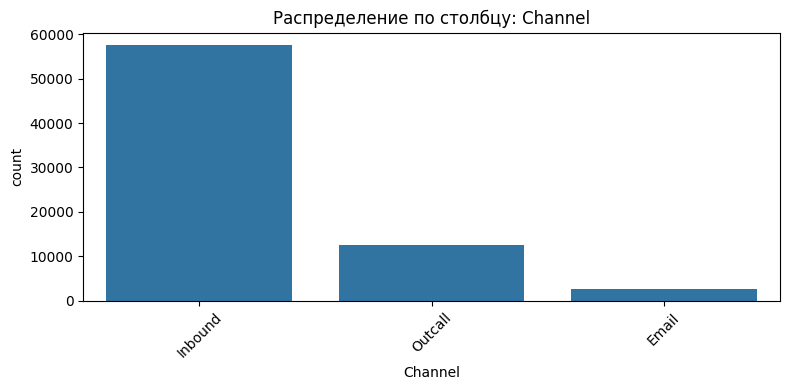

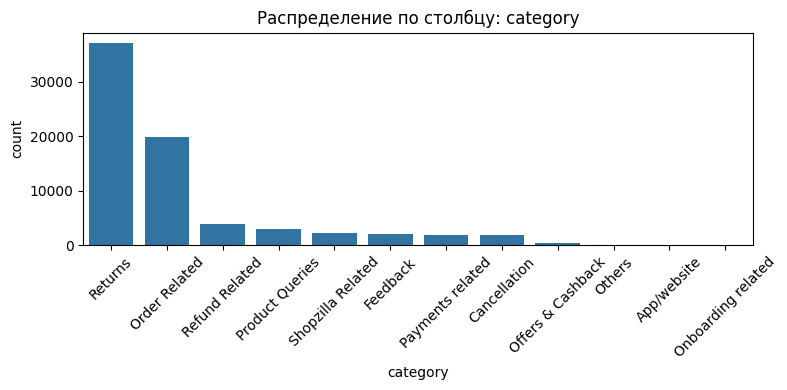

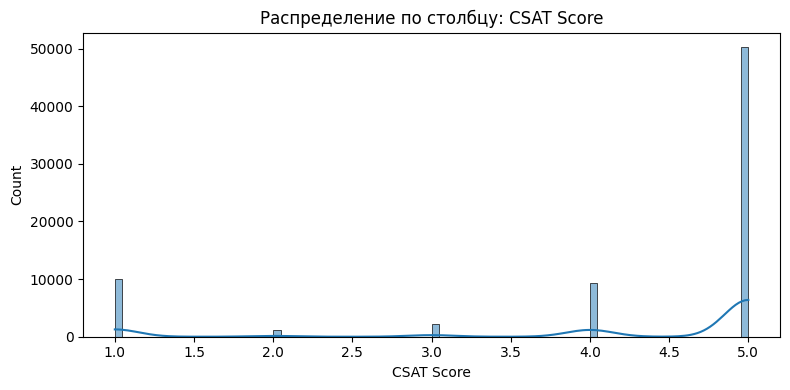

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Список колонок, по которым имеет смысл строить гистограммы или плотности
cols_to_plot = ['Channel', 'category', 'CSAT Score']

for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    if data_12[col].dtype == 'object':
        sns.countplot(data=data_12, x=col, order=data_12[col].value_counts().index)
        plt.xticks(rotation=45)
    else:
        sns.histplot(data_12[col], kde=True)
    plt.title(f'Распределение по столбцу: {col}')
    plt.tight_layout()
    plt.show()


#### Задание 3
При выполнении третьего задания убедитесь более явно, что обильное количество пропущенных значений не является ошибкой объединения. Проведите больше, чем одну точечную проверку.


In [ ]:
orders_data[orders_data.Order_id == '8c910188-c387-4a1b-8d90-24379ec8c047']

,Order_id,order_date_time,Customer_City,Product_category,Item_price


In [ ]:
orders_data[orders_data.Order_id == '22c5643c-3d54-487c-8863-c57e198a70be']

,Order_id,order_date_time,Customer_City,Product_category,Item_price


In [ ]:
orders_data[orders_data.Order_id == 'abd330a8-f3e2-4b7a-b14a-4ed35c4ec023']

,Order_id,order_date_time,Customer_City,Product_category,Item_price


#### Задание 4
При выполнении третьего задания попробуйте использовать разные виды соединений. Как это отражается на структуре датасета?

In [ ]:
inner_join = data_123.merge(orders_data, on='Order_id', how='inner')
print("Размер после inner join:", inner_join.shape)

right_join = data_123.merge(orders_data, on='Order_id', how='right')
print("Размер после right join:", right_join.shape)

outer_join = data_123.merge(orders_data, on='Order_id', how='outer')
print("Размер после outer join:", outer_join.shape)

Размер после inner join: (16951, 15)
Размер после right join: (86070, 15)
Размер после outer join: (155026, 15)


#### Задание 5
Изучите документацию pandas в части описания методов merge и join.

In [ ]:
help(pd.DataFrame.merge)
help(pd.DataFrame.join)

Help on function merge in module pandas.core.frame:

merge(self, right: 'DataFrame | Series', how: 'MergeHow' = 'inner', on: 'IndexLabel | AnyArrayLike | None' = None, left_on: 'IndexLabel | AnyArrayLike | None' = None, right_on: 'IndexLabel | AnyArrayLike | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool | None' = None, indicator: 'str | bool' = False, validate: 'MergeValidate | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    .. war

#### Задание 6
Познакомьтесь с форматом представления дат strftime.

In [ ]:
from datetime import datetime

In [ ]:
# Парс строки и вывод даты в другом формате
dt = datetime.strptime("2023-08-29 08:02:00", "%Y-%m-%d %H:%M:%S")
dt.strftime("%d.%m.%Y %H:%M")

'29.08.2023 08:02'

# ЛР 5.2 - Инжиниринг численных признаков

### Цель работы

Ознакомиться с основными приемами работы с численными атрибутами в датасетах для машинного обучения.


### Содержание работы

1. Загрузить прилагающийся к работе датасет PRSA_Data
2. Выведите на экран основную информацию о датасете. Идентифицируйте значения вне разумного диапазона
3. Постройте визуализацию распределения каждого численного атрибута.
4. Исходя из распределения атрибутов по необходимости примените бинаризацию численных признаков.
5. Постройте совместное распределение каждого признака вместе с целевой переменной. Сделайте вывод о необходимости проведения группировки данных.
6. Удалите или ограничьте экстремальные значения атрибутов.
7. Избавьтесь от пропущенных значений в датасете.
8. При необходимости округлите излишне точные значения атрибутов.
9. Рассмотрите возможность преобразования шкалы атрибута к логарифмической.

### Выполнение

In [ ]:
prsa_data = pd.read_csv("PRSA_Data.csv", index_col=0)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [ ]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 35063
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         35064 non-null  int64  
 1   SO2        35064 non-null  float64
 2   NO2        35064 non-null  float64
 3   CO         35064 non-null  float64
 4   O3         35064 non-null  float64
 5   PRES       35064 non-null  float64
 6   RAIN       35064 non-null  float64
 7   wd         35064 non-null  object 
 8   WSPM       35064 non-null  float64
 9   AQI Label  35064 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


Так как большая часть атрибутов датасета выражена численно, информативным будет посмотреть основную численную статистику по данным:



In [ ]:
prsa_data.describe()

,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


Первым этапом анализа данных должно быть устранение явных ошибок в данных - значений атрибутов вне разумного диапазона. На предыдущем этапе мы уже обнаружили эту проблему. Значение концентрации газа в воздухе просто по смыслу не может быть отрицательным. При этом во всем датасете во всех колонках присутствует только одно отрицательное значение: -1. Скорее всего, так в датасете обозначаются неизвестные значения.

Такие "специальные значения" в численных атрибутах надо исправлять. Заменим их на np.nan, чтобы они явно отображались как пропуски и мы смогли в дальнейшем корректно с ними работать:



In [ ]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [ ]:
prsa_data.describe()

,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,0.068263,1.501215
std,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,0.896726,1.104472
min,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.000000,0.800000
50%,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,0.000000,1.200000
75%,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,0.000000,2.000000
max,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


Визуализация распределения атрибутов

После того, как мы вычистили явные ошибки в данных, можно познакомиться с эмпирическим распределением каждого признака. Для этого можно использовать разные средства визуализации, например, гистограмму:



<Axes: xlabel='SO2', ylabel='Count'>

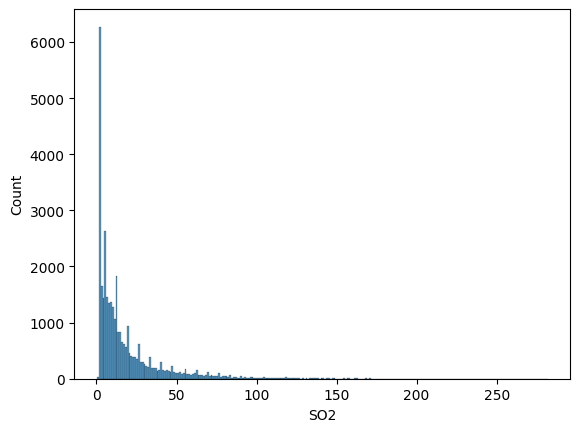

In [ ]:
sns.histplot(prsa_data.SO2)

Кроме гистограммы можно построить, например, график ядерной оценки плотности распределения:



<Axes: xlabel='NO2', ylabel='Density'>

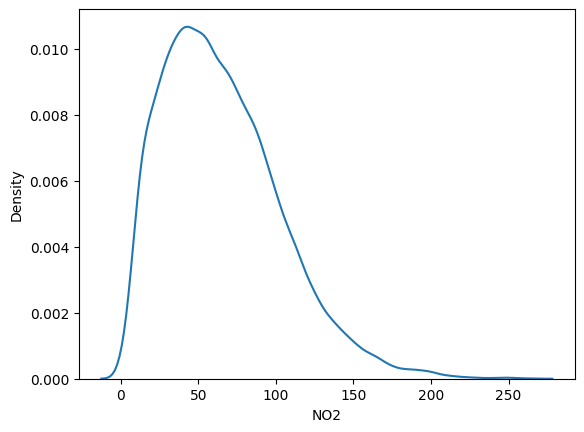

In [ ]:
sns.kdeplot(prsa_data.NO2)

В дальнейшем будем пользоваться гистограммами. Вот распределение значений концентрации CO:

<Axes: xlabel='CO', ylabel='Count'>

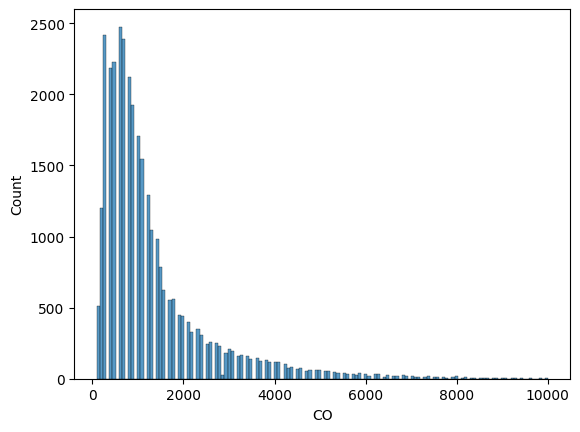

In [ ]:
sns.histplot(prsa_data.CO)

Здесь видно достаточно гладкое распределение с модой в районе 1000.



Вот более смещенное распределение - O3. На гистограмме явно видно, что нулевая концентрация встречается гораздо чаще ненулевых значений. В дальнейшем это может быть кандидат на бинаризацию:



<Axes: xlabel='O3', ylabel='Count'>

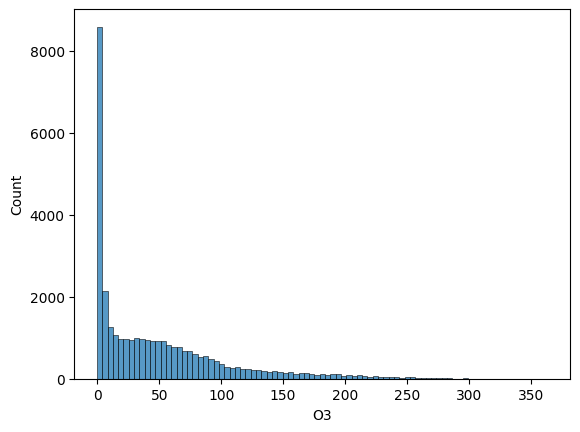

In [ ]:
sns.histplot(prsa_data.O3)

Распределение значения давления отличается от всех предыдущих. Видно, что есть некоторый диапазон условно равновероятных, "нормальных" значений, а частота значений давления вне этого диапазона быстро спадает.

Такие атрибуты тоже можно категоризовывать при необходимости.





<Axes: xlabel='PRES', ylabel='Count'>

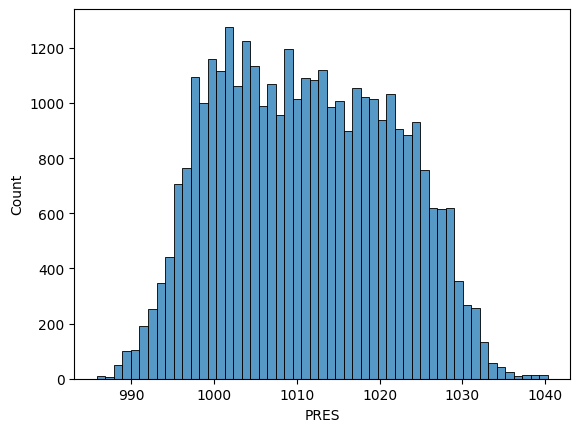

In [ ]:
sns.histplot(prsa_data.PRES)

Распределение количества осадков тоже особенное:



<Axes: xlabel='RAIN', ylabel='Count'>

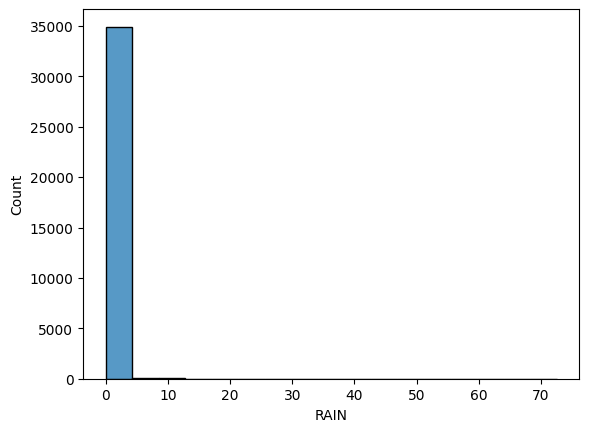

In [ ]:
sns.histplot(prsa_data.RAIN)

Мы видим, что отсутствие осадков - самое распространенное значение.

<Axes: xlabel='WSPM', ylabel='Count'>

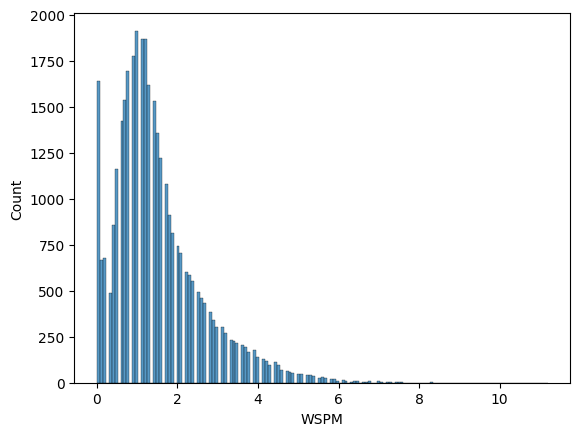

In [ ]:
sns.histplot(prsa_data.WSPM)

Бинаризация атрибутов

Такие распределения, как в атрибуте "количество осадков" могут повредить эффективности модели, так как относительное численной значение при таком распределении не несет, по сути, статистической значимости по сравнению с информацией о том, были ли вообще осадки или нет. То есть этот атрибут из численного можно превратить в категориальный. Ведь в нашем датасете всего 1436 точек из 35 000 имеют ненулевое значение:



In [ ]:
prsa_data.RAIN[prsa_data.RAIN > 0]

,RAIN
267,0.1
268,0.4
269,0.1
270,0.9
271,0.9
...,...
34891,0.2
34892,0.7
34893,0.9
34894,0.4


Так важно ли будет для модели конкретное численное значение количества осадков при таком малом относительном объеме? Мы можем ввести в модель новый категориальный, а точнее, бинарный атрибут, кодирущий наличие либо отсутствие осадков в данном измерении:



In [ ]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


Визуализация связи атрибутов с целевой переменной

После первоначального преобразования данных нужно определить, как именно связаны различные атрибуты со значением целевой переменной. Так как мы исследуем численные атрибуты при категориальной целевой переменной, то воспользуемся визуализацией нескольких оценок плотности распределения для разных классов:



Мы получим на графике несколько линий, каждая из которых соответствует распределению выбранного атрибута при разных значениях целевой переменной:



<Axes: xlabel='SO2', ylabel='Density'>

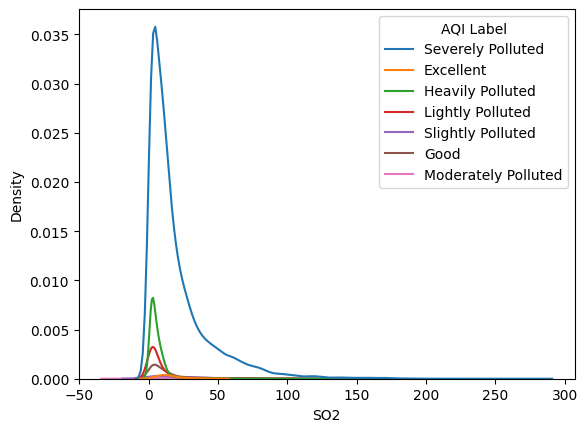

In [ ]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

Так как у нас наблюдается дисбаланс классов (это мы еще не исследовали, но из данного графика ясно видно, что всего объектов разных классов сильно разное количество), то нам не очень важен на таких графиках конкретный уровень каждой линии. Важно понять, есть ли участки на горизонтальной оси, на которых соотношение разных существенно отличается.

Например, на первом графике, явных изменений в форме разных линий нет. Можно предположить, что изолированно данный атрибут не сильно влияет на значение целевой переменной. Пойдем дальше и визуализируем второй атрибут:



<Axes: xlabel='NO2', ylabel='Density'>

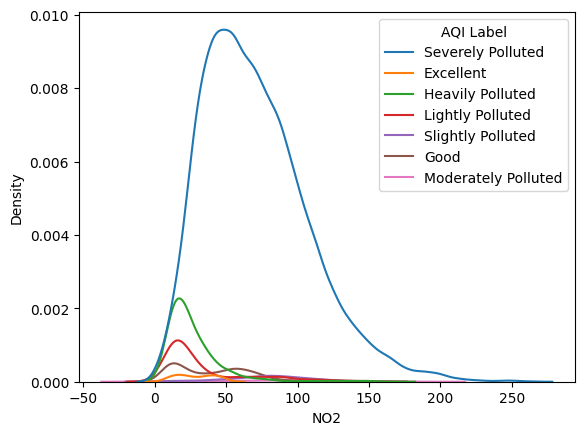

In [ ]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label")

Здесь уже видны различия между соотношениям разных классов. Но они не очень ярко выраженные. Перейдем к третьему атрибуту:



<ipython-input-94-0dcfe490e9c4>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")


<Axes: xlabel='CO', ylabel='Density'>

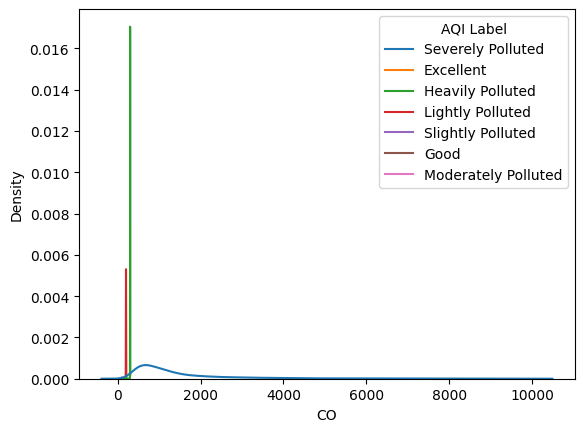

In [ ]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")

Данный график очень смещен из-за того, что плотности некоторых классов сильно сконцентрированы, что искажает масштаб графика. В таких случаях помогает попробовать изобразить этот же график, но с логарифмическим масштабом вертикальной оси:



<ipython-input-95-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

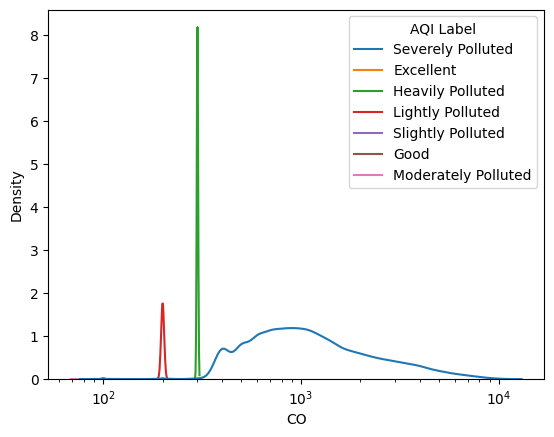

In [ ]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

На некоторых участках диапазона значений данного атрибута преобладает значение "Lightly polluted", на других - "Heavily polluted". Это значит, что данный атрибут очень важен для предсказания значения целевой переменной. В дальнейшем мы используем эту информацию для категоризации этого атрибута.

Следующие графики демонстрируют схожее поведение разных классов с поправкой на общую форму распределения разных атрибутов:



<Axes: xlabel='O3', ylabel='Density'>

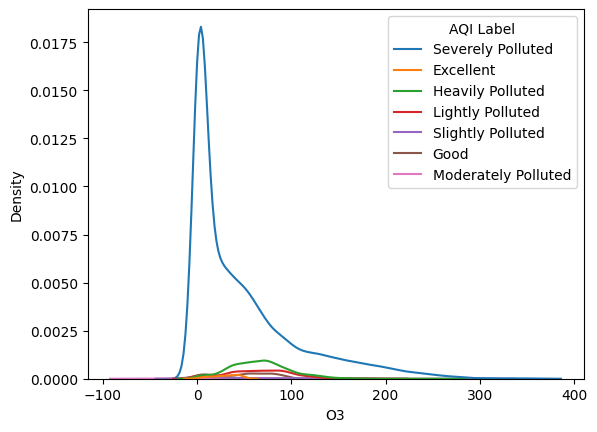

In [ ]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label")

<Axes: xlabel='PRES', ylabel='Density'>

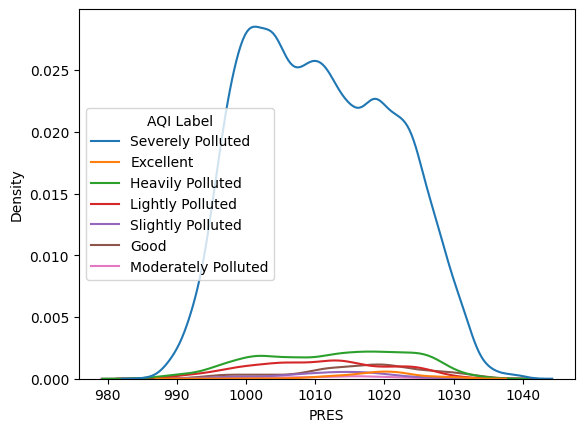

In [ ]:
sns.kdeplot(data=prsa_data, x="PRES", hue="AQI Label")

<Axes: xlabel='WSPM', ylabel='Density'>

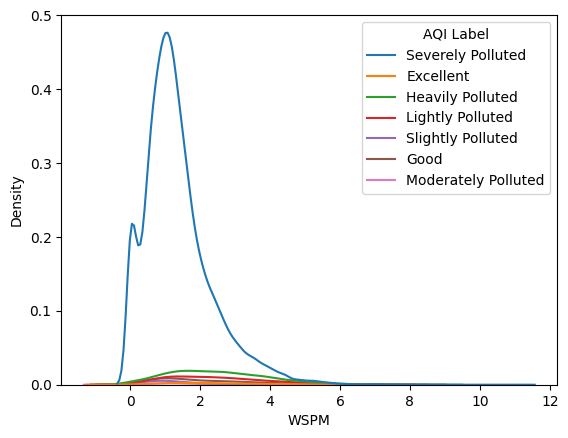

In [ ]:
sns.kdeplot(data=prsa_data, x="WSPM", hue="AQI Label")

В целом, анализ влияния атрибутов показывает, что их влияние скорее проявляется в совокупности. Нет одного четко дифференцирующего фактора, особенно указывающего на все возможные значения целевой переменной.

Группировка численных значений

В некоторых случаях бывает полезно объединить численные значения атрибутов на метку диапазона значений. То есть мы объединяем (группируем) объекты по значению данного атрибута и затем заменяем сам численный атрибут на ту группу, в которую попал объект. Этот прием называется дискретизация или группировка численных значений. Например, возьмем атрибут "CO". На предыдущем шаге мы уже выяснили, что объекты, находящиеся в различных диапазонах его значений будут иметь разное распределение целевой переменной. Условные границы этих диапазонов можно изобразить на графике:



<ipython-input-99-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

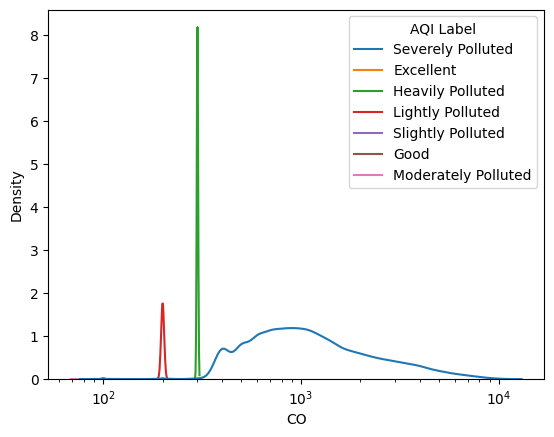

In [ ]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

В данном случае, для значения целевой переменной не так важно конкретное численной значение концентрации CO в воздухе. Достаточно информации, в какой диапазон попадает данное измерение. Поэтому попробуем добавить к датасету атрибут "Группа по CO":

In [ ]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


Здесь у нас возникает проблема. Так как в исходном столбце были пропущенные значения, в получившемся столбце тоже будут пропуски. Так как этот новый атрибут - категориальный, проще всего сразу заполнить пропущенные значения специальным названием класса. В данном случае, естественно будет присвоить этому классу метко "0", что будет означать - "значение неизвестно":

In [ ]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


Удаление экстремальных значений

При анализе распределений особый интерес вызывают такие, у которых наблюдаются длинные "хвосты" - то есть очень редкие значения далеко от среднего или медианного значения. Это такие объекты, которых очень мало (может быть, даже один) и которые по значению данной характеристики сильно отличаются от основной массы объектов. Часто такие выбросы свидетельствуют о некорректных данных, либо о аномальных и непоказательных объектах. Объекты, которые нерелевантны решаемой задаче следует удалять из выборки. Но сами по себе длинные "хвосты" распределений могут повредить работе моделей. Поэтому зачастую датасеты с большими выбросами очищают от них автоматически.

Для этого можно удалить объекты, значения определенного атрибута у которых выше или ниже определенного порога или процентиля. Но в таком случае мы лишаемся определенного количества информации, которая была заключена в значении других атрибутов данного объекта. Альтернативный способ - клиппинг. Он заключается в том, что мы заменяем экстремальные значения атрибута граничным.

Возьмем для примера колонку "PRES" нашего датасета. В данном примере определим границы экстремальных значений опять же на глаз. И заменим все значения, находящиеся вне этих границ:



<Axes: xlabel='PRES', ylabel='Count'>

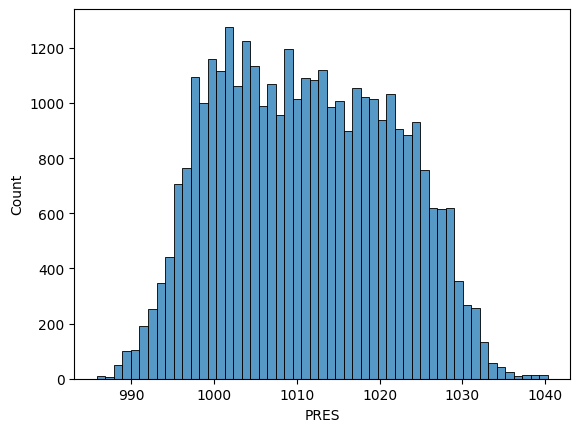

In [ ]:
sns.histplot(prsa_data.PRES)

In [ ]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<Axes: xlabel='PRES', ylabel='Count'>

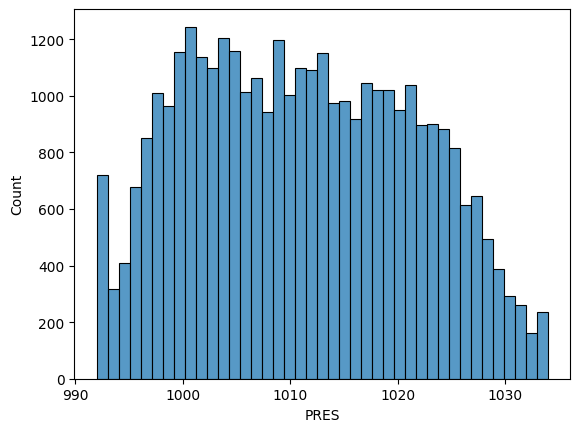

In [ ]:
sns.histplot(prsa_data.PRES)

Заполнение пропусков

Обязательной частью предварительной обработки данных является устранение отсутствующих значений. В первую очередь нужно позаботиться о том, чтобы все реально имеющиеся в данных пропуски отображались в датасете как np.nan или другое детектируемое значение. Это мы уже сделали.

Теперь можно визуализировать пропущенные значения в данных:



<Axes: >

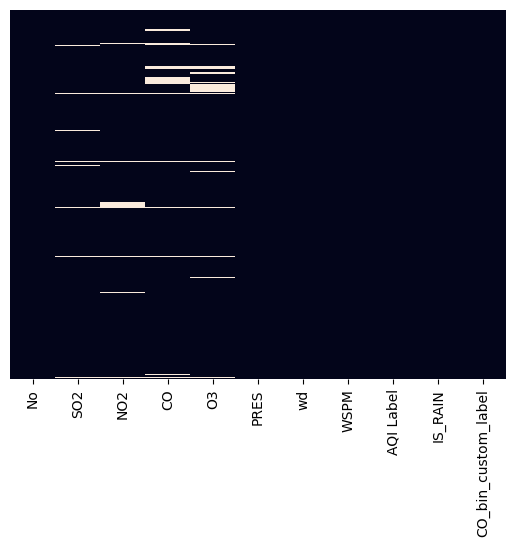

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

Можно обратить внимание на то, что в датасете прослеживаются горизонтальные полосы. Это объекты, по которым неизвестны значения нескольких атрибутов. Можно вывести индексы объектов, у которых неизвестно значение более двух атрибутов:



In [ ]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

,0
3,2
276,3
435,2
459,2
555,2
...,...
34880,4
34883,4
34885,4
35029,2


Так как такие незаполненные объекты составляют очень малый процент выборки, для простоты обработки их можно просто удалить:



In [ ]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

Теперь мы видим, что пропуски группируются по столбцам:



<Axes: >

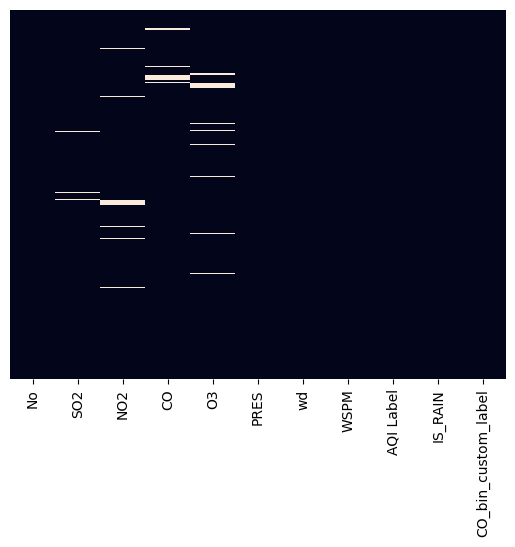

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
prsa_data.isnull().sum()

,0
No,0
SO2,281
NO2,702
CO,1028
O3,1300
PRES,0
wd,0
WSPM,0
AQI Label,0
IS_RAIN,0


По столбцу SO2 пропущено всего 281 значение. Это менее одного процента выборки. Можно просто заменить пропуски на среднее значение. Но так как эмпирическое распределение этого признака имеет большую асимметрию, лучше использовать медиану:



In [ ]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

С другими столбцами, например, O3 искажение будет более существенным. Поэтому воспользуемся заполнением не средним, а случайным значением. Для этого сначала сформируем временную серию, содержащую все пропуски из данного столбца:

In [ ]:
filler = prsa_data.O3[prsa_data.O3.isna()]

filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

filler

,O3
436,184.904037
460,18.441996
556,16.918235
652,1.017567
748,1.656584
...,...
33124,131.000435
33220,37.867430
33604,92.956726
33892,2.477836


In [ ]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

<Axes: xlabel='O3', ylabel='Count'>

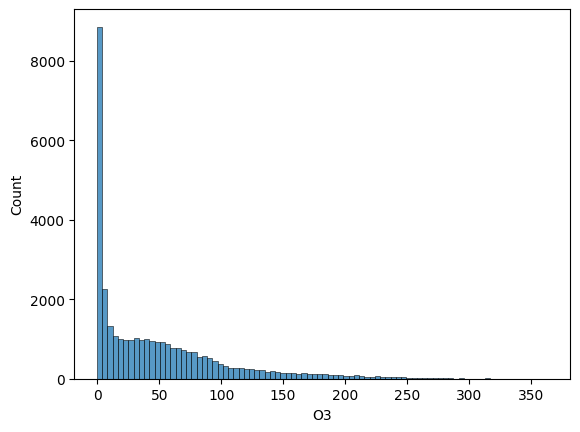

In [ ]:
sns.histplot(prsa_data.O3)

Округление атрибутов

При визуальном осмотре датасета можно заметить, что все численные значения имеют один знак после запятой. Но столбец O3 записан с гораздо большей точностью - 5 знаков после запятой. Такая точность является избыточной, так как получается, что в этой колонке записаны 7 значащих цифр. От лишних данных можно избавиться, просто округлив данные значения:



In [ ]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


Логарифмирование атрибутов

Еще один прием, который не часто применяется, но иногда бывает полезен - кастомное решкалирование значений. В целом, решкалирование - это изменение шкалы измерения атрибута. Например, изменение граничных значений, масштабирование, нормализация. Но в определенных случаях, может быть полезно применить и другое преобразование данных. Опять обратим внимание на столбец SO2. Сейчас его значения очень сильно смещены. Малых значений очень много, а значит, что даже маленькие разницы между ними могут быть существенны для модели. А вот больших значений очень мало, и даже большие расстояния между ними могут быть не очень показательны.

Вообще, математические модели лучше всего работают с распределениями, похожими на равномерное или нормальное. Очень большой дисбаланс в распределении может быть вреден для эффективности.

Мы можем попробовать применить к атрибуту любую математическую функцию, чтобы преобразовать его к более равномерному распределению. Только эта функция должна быть непрерывная и монотонная. В данном случае, нам будет полезен логарифм:



In [ ]:
prsa_data.SO2 = np.log(prsa_data.SO2)

<Axes: xlabel='SO2', ylabel='Count'>

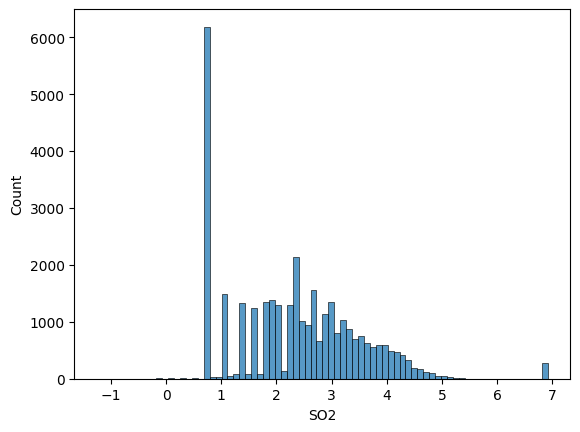

In [ ]:
sns.histplot(prsa_data.SO2)

### Задания для самостоятельного выполнения

#### Задание 1
При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

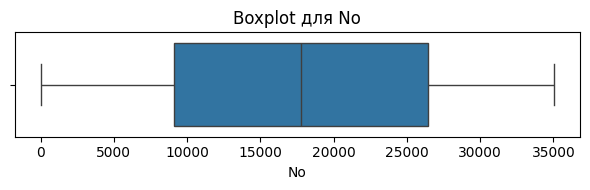

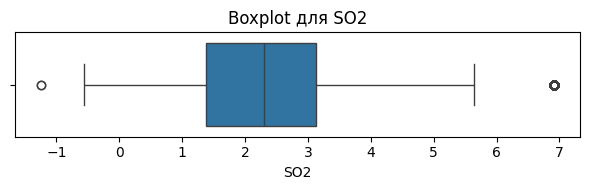

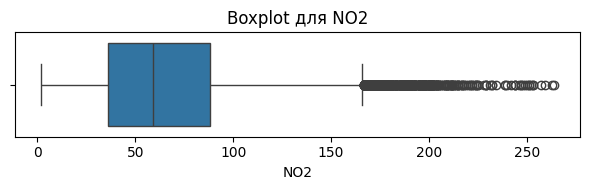

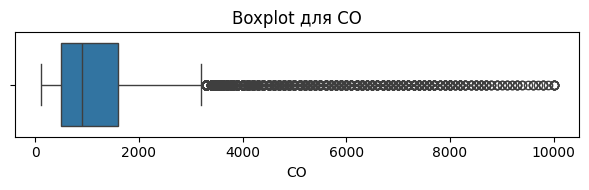

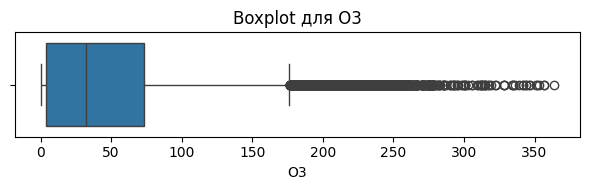

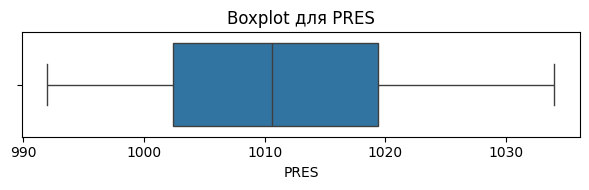

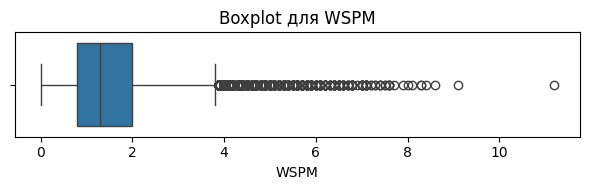

In [ ]:
num_cols = ['No', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']

# Построим boxplot для всех признаков
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=prsa_data[col])
    plt.title(f"Boxplot для {col}")
    plt.tight_layout()
    plt.show()

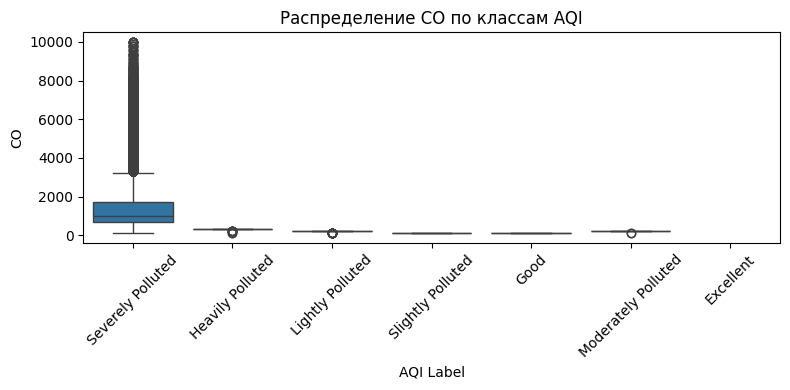

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=prsa_data, x="AQI Label", y="CO")
plt.title("Распределение CO по классам AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Задание 2
При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.


In [ ]:
prsa_data = pd.read_csv("PRSA_Data.csv", index_col=0)


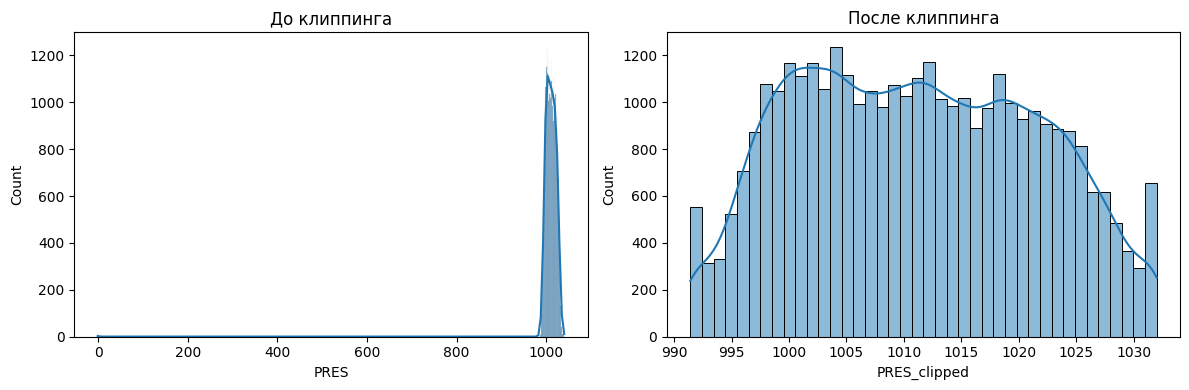

In [ ]:
# Пример клиппинга для PRES по 1% и 99% перцентилям
low, high = prsa_data['PRES'].quantile([0.01, 0.99])
prsa_data['PRES_clipped'] = prsa_data['PRES'].clip(lower=low, upper=high)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(prsa_data['PRES'], ax=axes[0], kde=True)
axes[0].set_title('До клиппинга')
sns.histplot(prsa_data['PRES_clipped'], ax=axes[1], kde=True)
axes[1].set_title('После клиппинга')
plt.tight_layout()
plt.show()

#### Задание 3
Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.


<Axes: >

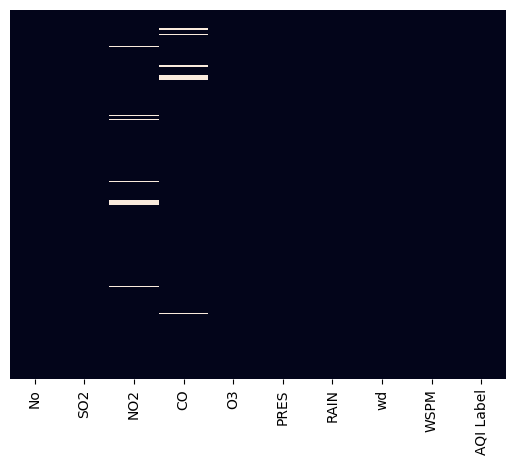

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
prsa_data['CO'] = prsa_data['CO'].fillna(prsa_data['CO'].median())
prsa_data['NO2'] = prsa_data['NO2'].fillna(prsa_data['NO2'].median())

<Axes: >

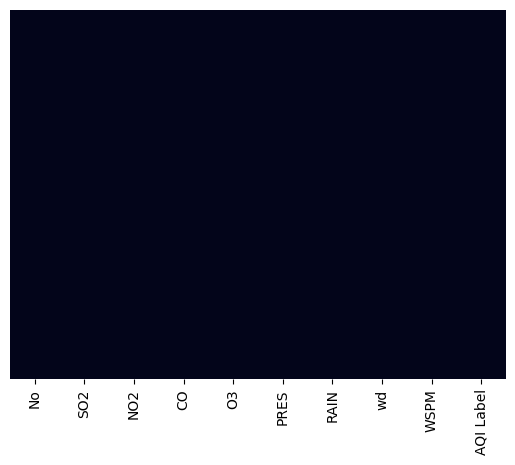

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

#### Задание 4
Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

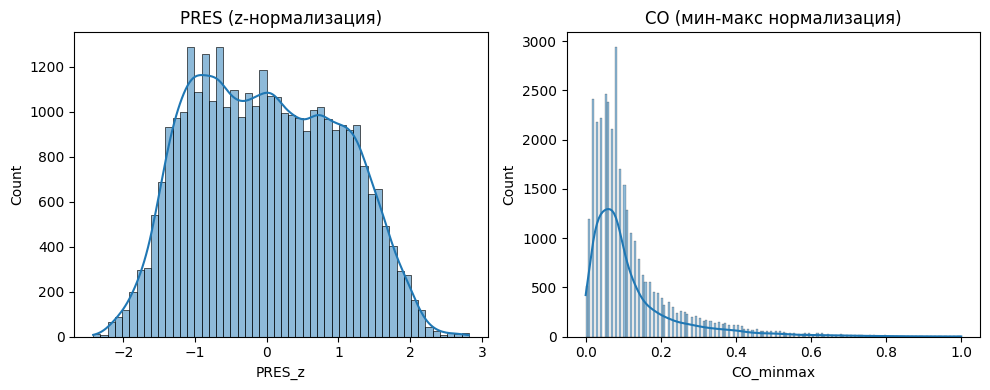

In [ ]:
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

prsa_data['PRES_z'] = scaler_std.fit_transform(prsa_data[['PRES']])
prsa_data['CO_minmax'] = scaler_minmax.fit_transform(prsa_data[['CO']])

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(prsa_data['PRES_z'], kde=True, ax=axes[0])
axes[0].set_title("PRES (z-нормализация)")
sns.histplot(prsa_data['CO_minmax'], kde=True, ax=axes[1])
axes[1].set_title("CO (мин-макс нормализация)")
plt.tight_layout()
plt.show()


#### Задание 5
Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.


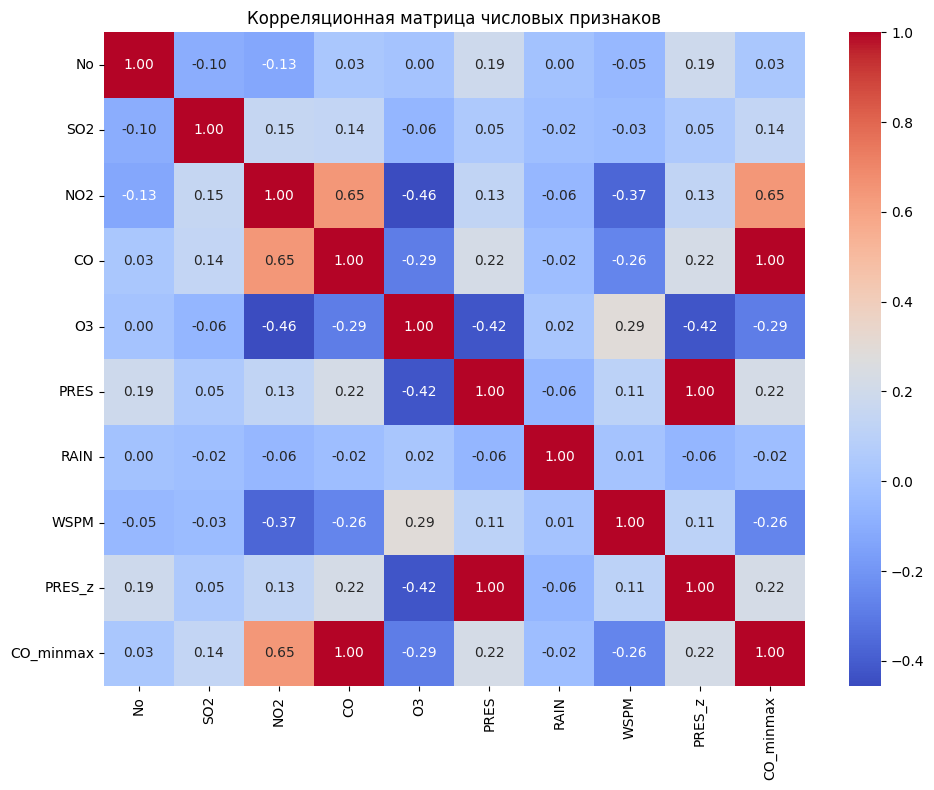

In [ ]:
# Корреляционная матрица по численным столбцам
corr = prsa_data.select_dtypes('number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица числовых признаков")
plt.tight_layout()
plt.show()


# ЛР 5.3 - Логистическая регрессия

### Цель работы

Ознакомиться с основными приемами работы с категориальными атрибутами в датасетах для машинного обучения.


### Содержание работы

1. Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support. Выведите основную информацию по каждому датасету и сделайте выводы.
2. Визуализируйте распределение каждого категориального признака в датасете Customer support. Учитывайте количество уникальных значений.
3. Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.
4. Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.
5. Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.
6. Заполните отсутствующие значения в датасете.
7. На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.
8. В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()

### Выполнение

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
CS_data = pd.read_csv('Customer_support_data.csv', index_col=0)
CS_data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


Сейчас нас интересует тот факт, что в датасете большое количество категориальных атрибутов. Еще присутствуют даты и пара численных колонок, но с ними мы не будем разбираться в этой работе. При этом целевая переменная - оценка удовлетворенности - является численной. То есть перед нами датасет для задачи регрессии. Хотя, можно целевую переменную воспринимать и как классификацию, это вопрос интерпретации.

Основная информация о колонках показывает, что в датасете есть большое количество пропусков. Также видим общую информацию о форме набора данных:



In [ ]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85907 entries, 7e9ae164-6a8b-4521-a2d4-58f7c9fff13f to 07c7a878-0d5a-42e0-97ef-de59abec0238
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   channel_name             85907 non-null  object 
 1   category                 85907 non-null  object 
 2   Sub-category             85907 non-null  object 
 3   Customer Remarks         28742 non-null  object 
 4   Order_id                 67675 non-null  object 
 5   order_date_time          17214 non-null  object 
 6   Issue_reported at        85907 non-null  object 
 7   issue_responded          85907 non-null  object 
 8   Survey_response_Date     85907 non-null  object 
 9   Customer_City            17079 non-null  object 
 10  Product_category         17196 non-null  object 
 11  Item_price               17206 non-null  float64
 12  connected_handling_time  242 non-null    float64
 13  Agent_name     

In [ ]:
CS_data.describe(include="all")

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


Самое полезное в этой таблице - соотношение количества уникальных к общему количеству значений по колонке. Если они совпадают или близки, это значит, что в атрибуте все или почти все значения разные. В таком случае стоит задуматься о его удалении, либо преобразовании. Также важно количество самого вероятного значения: этот показатель дает информацию о дисбалансе значений. Но более подробную информацию можно получить из анализа распределения атрибута.

Описательную статистику по датасету Титаник приведем еще в более компактном виде:



In [ ]:
T_data = pd.read_csv('titanic.csv', index_col=0)

In [ ]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Dooley, Mr. Patrick",male,347082,G6,S
freq,491,1,577,7,4,644


Здесь явно видно, например, что имя - полностью уникальный атрибут. А вот в одной каюте могло находиться до четырех человек. Что удивительно, номера билетов почему-то тоже повторяются.



Визуализация распределения атрибутов и связь с целевой переменной

Для визуализации распределения категориальных атрибутов воспользуемся самым простым инструментом - гистограммой. Построим гистограмму распределения первого существенного атрибута:



<Axes: xlabel='channel_name', ylabel='Count'>

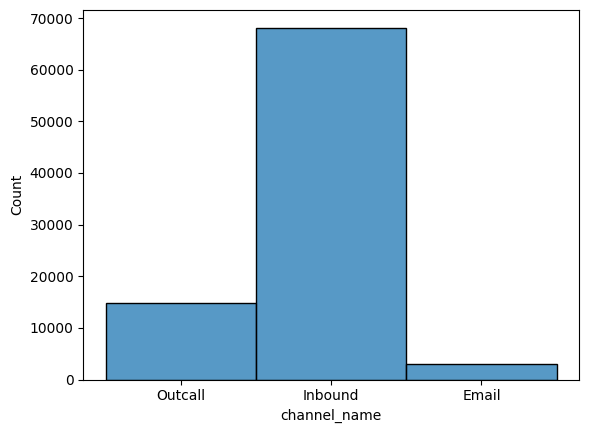

In [ ]:
sns.histplot(data=CS_data, x="channel_name")

In [ ]:
CS_data.channel_name.value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


Сразу же построим совместное распределение данного признака и целевой переменной. Так как признак категориальный, а целевая переменная - численная, мы можем построить на столбчатой диаграмме среднее значение целевой переменной для каждой категории:



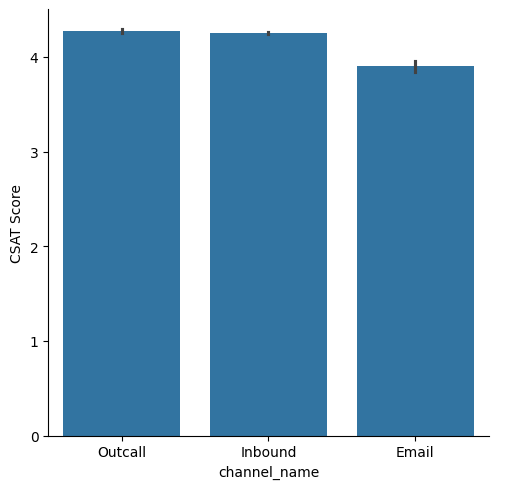

In [ ]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

На графике видно, что средние значения для первый двух категорий отличаются несущественно, а по третьей - сильно ниже. Можно сделать вывод, что канал обращения влияет на потенциальную удовлетворенность клиента и обращения по электронной почте в среднем немного меньше нравятся клиентам

Переходим к следующей категориальной переменной. Прежде чем строить гистограмму выведем таблицу значений:

In [ ]:
CS_data.category.value_counts()

,count
category,
Returns,44097
Order Related,23215
Refund Related,4550
Product Queries,3692
Shopzilla Related,2792
Payments related,2327
Feedback,2294
Cancellation,2212
Offers & Cashback,480


Если категорий очень много, таблицу значений читать проще, так как можно ограничиться анализом только самых распространенных значений. В данном случае значений не так много и можно построить гистограмму. Но мы построим ее по упорядоченному набору значений:



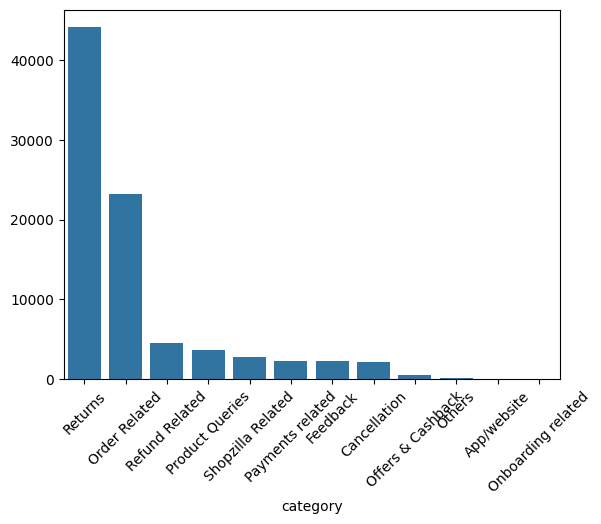

In [ ]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

В данном случае, наблюдается типичный для таких распределений дисбаланс категорий. Присутствуют очень малочисленные категории. В таких случая стоит подумать над объединением категорий. Хотя представленный на графике случай еще далеко не самый экстремальный.

Теперь выведем среднее значение удовлетворенности в зависимости от значения данного признака:



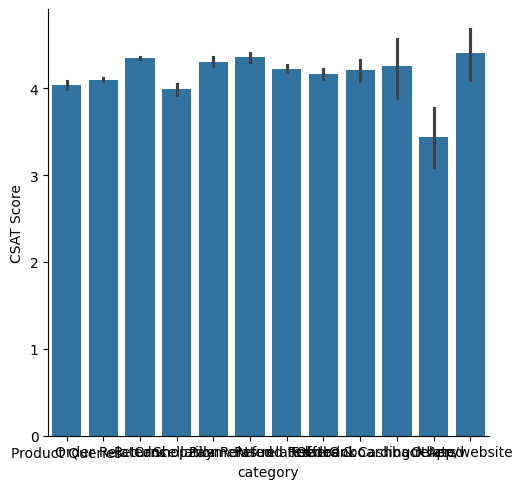

In [ ]:
sns.catplot(data=CS_data, x="category", y="CSAT Score", kind="bar")

Можем видеть наличие влияния: есть разница между средним значением целевой переменной для разных категорий. При этом есть категория, которой соответствует очень низкое значение удовлетворенности. Из этой аналитики тоже можно сделать значимые выводы.



Теперь визуализируем распределение по подкатегориям. Заметно, что при увеличении количества категорий анализ становится проводить затруднительно:



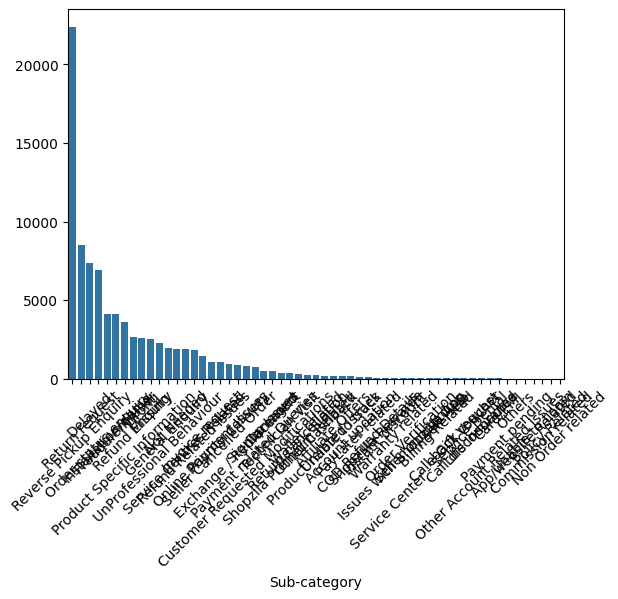

In [ ]:
counts = CS_data["Sub-category"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

в целом, мы видим такое же характерное распределение - очень популярное значение и большое количество редких разных значений. Такие объемные распределения как раз более удобно анализировать в виде таблицы, так как можно вывести первые несколько строк:

In [ ]:
CS_data["Sub-category"].value_counts()[:10]

,count
Sub-category,
Reverse Pickup Enquiry,22389
Return request,8523
Delayed,7388
Order status enquiry,6922
Installation/demo,4116
Fraudulent User,4108
Product Specific Information,3589
Refund Enquiry,2665
Wrong,2597


Визуализация совместного распределения с целевой переменной тоже выглядит довольно страшно:

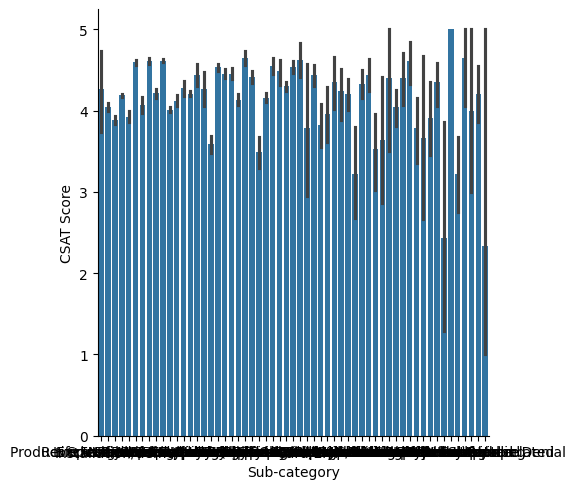

In [ ]:
sns.catplot(data=CS_data, x="Sub-category", y="CSAT Score", kind="bar")

Казалось бы, по этому графику ничего нельзя понять. Но можно сделать вывод: чем менее популярное значение, там больше дисперсия (обозначенная на графике черной вертикальной линией) целевой переменной. Этого и следовало ожидать.

Теперь выведем информацию о столбце "Customer remarks". Так как это текст в свободной форме, и присутствует очень большое количество значений, нет смысла выводить гистограмму. Лучше как раз при помощи таблицы посмотреть несколько самых популярных значений:



In [ ]:
CS_data["Customer Remarks"].value_counts()[:20]

,count
Customer Remarks,
Good,1390
Good,1158
Very good,569
Nice,316
Thanks,276
Ok,259
No,258
Thank you,244
Nice,239


Помним, что по этому полю присутствует большое количество пропущенных значений. Можем сделать вывод, что если отзыв присутствует, то с большой долей вероятности он положительный. Поэтому на будущее заметим, что этот атрибут будет логично бинаризовать.

Распределение по городам тоже выведем в виде таблицы:



In [ ]:
CS_data["Customer_City"].value_counts()[:20]

,count
Customer_City,
HYDERABAD,722
NEW DELHI,688
PUNE,435
MUMBAI,406
BANGALORE,352
CHENNAI,271
KOLKATA,270
LUCKNOW,254
AHMEDABAD,253


Но чтобы хоть как-то понять общую форму распределения, все-таки изобразим гистограмму:



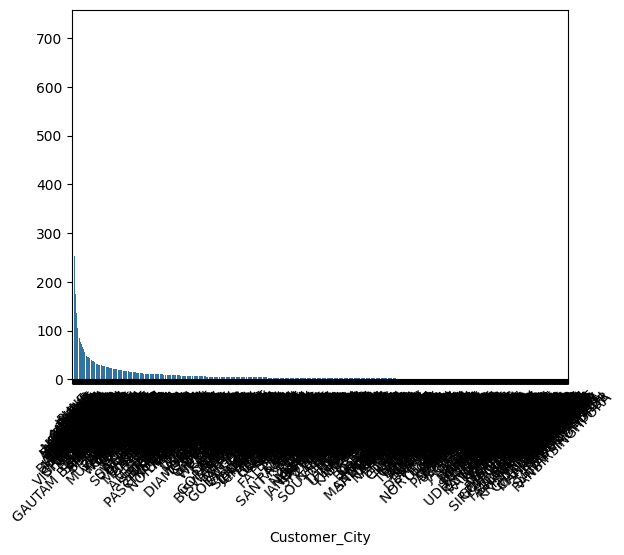

In [ ]:
counts = CS_data["Customer_City"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Явно наблюдается экспоненциальное распределение. Несколько очень популярных городов и огромное количество очень редких. Хотя, глядя на таблицу, складывается ощущение, что частоты падают довольно плавно.

Распределение по продуктовой категории не такое экстремальное. Конечно, есть более и менее популярные категории, но в целом дисбаланс не такой выраженный:



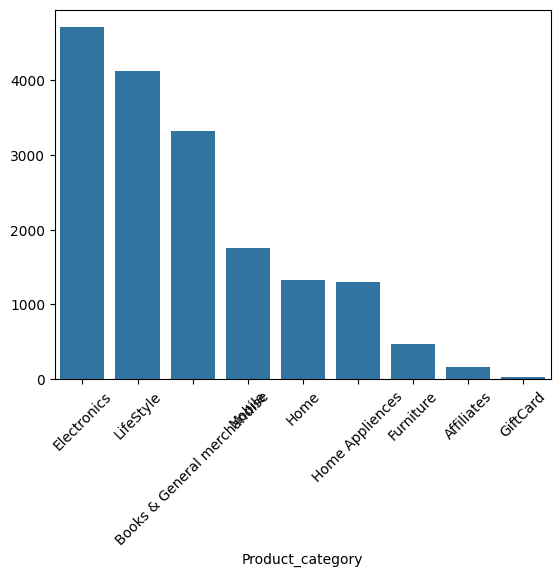

In [ ]:
counts = CS_data["Product_category"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

А вотвлияние на целевую переменную здесь не очень очевидно:



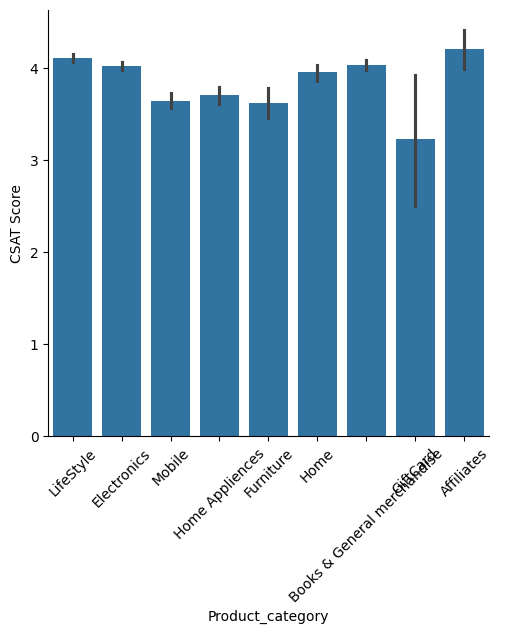

In [ ]:
sns.catplot(data=CS_data, x="Product_category", y="CSAT Score", kind="bar")
plt.xticks(rotation=45)
plt.show()

Распределение по операторам опять же выведем только в виде первых строк таблицы. Видим, что значений очень много и распределены они неравномерно:



In [ ]:
CS_data["Agent_name"].value_counts()[:20]

,count
Agent_name,
Wendy Taylor,429
Timothy Huff,265
David Smith,264
Jamie Smith,253
Kayla Wilson,216
Mrs. Jennifer Stone,200
Julie Williams,200
Sharon Bullock,195
Matthew White PhD,192


Руководителей операторов меньше. На гистограмме видно, что дисбаланс присутствует, но не очень яркий:



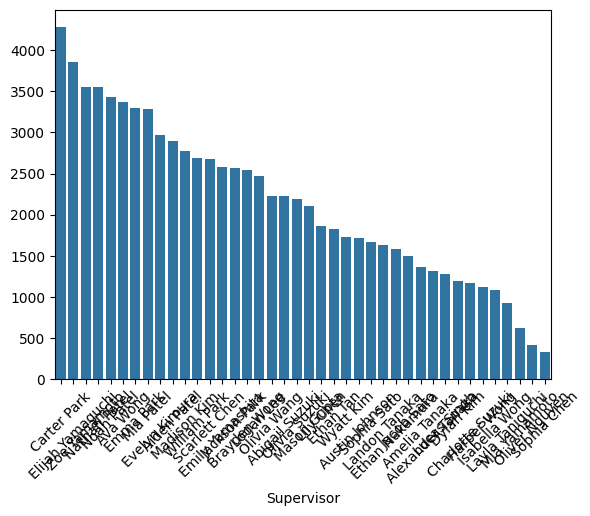

In [ ]:
counts = CS_data["Supervisor"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

При этом явны различия в средней оценке для разных руководителей:



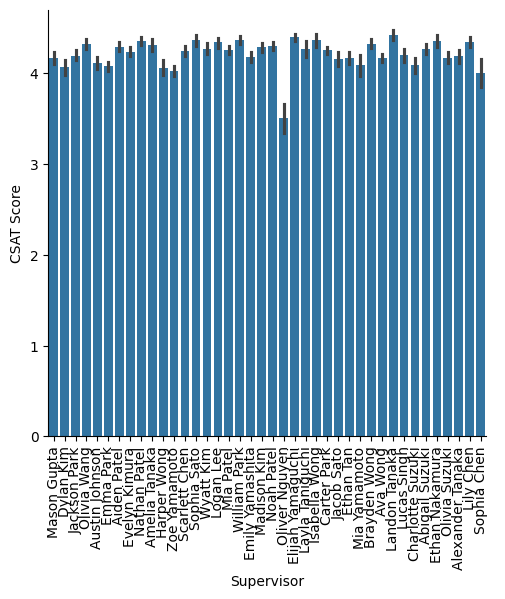

In [ ]:
sns.catplot(data=CS_data, x="Supervisor", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()

Количество менеджеров еще меньше и картина похожая на руководителей:



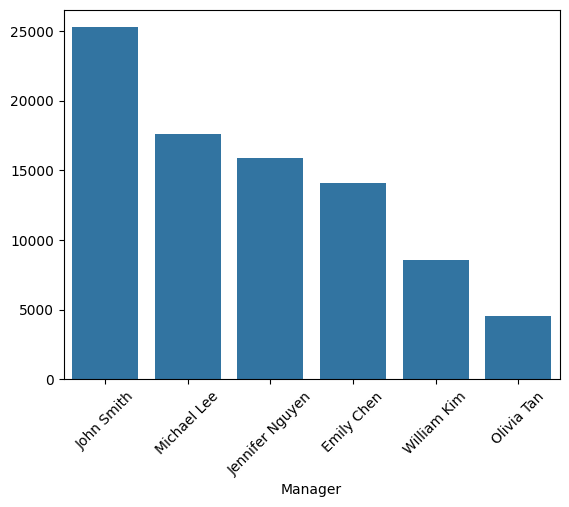

In [ ]:
counts = CS_data["Manager"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Но различия в целевой переменной у разных менеджеров не такое явное. Видимо, это уже слишком крупная группировка и все различия усредняются:



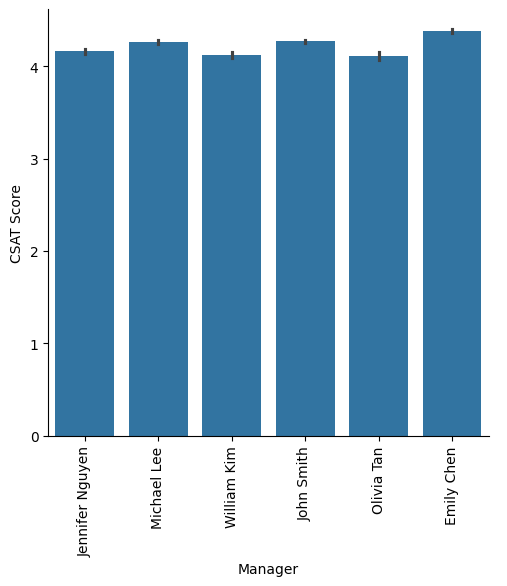

In [ ]:
sns.catplot(data=CS_data, x="Manager", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()

Распределение по типам контракта тоже не вызывает особых вопросов. Преобладают либо долгосрочные контракты, либо сотрудники на обучении:



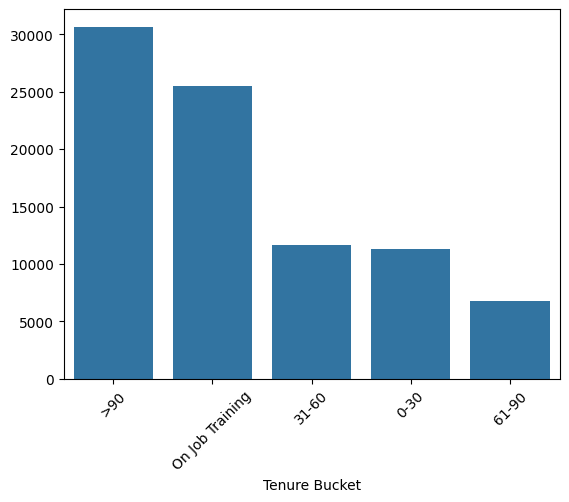

In [ ]:
counts = CS_data["Tenure Bucket"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

При этом у стажеров средняя оценка совсем незначительно ниже, чем у других категорий, по стальным значимых различий нет:



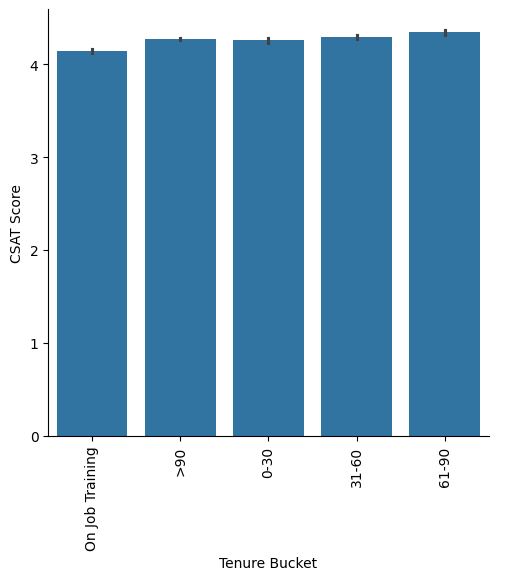

In [ ]:
sns.catplot(data=CS_data, x="Tenure Bucket", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()

По типам смен явно преобладают классические утренние и вечерние смены, гибридные варианты достаточно редки:



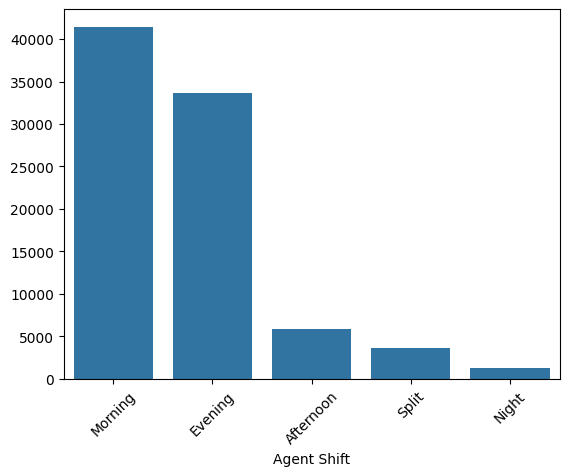

In [ ]:
counts = CS_data["Agent Shift"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Есть небольшая вариация в средних значениях удовлетворенности, но ничего особенно примечательного:

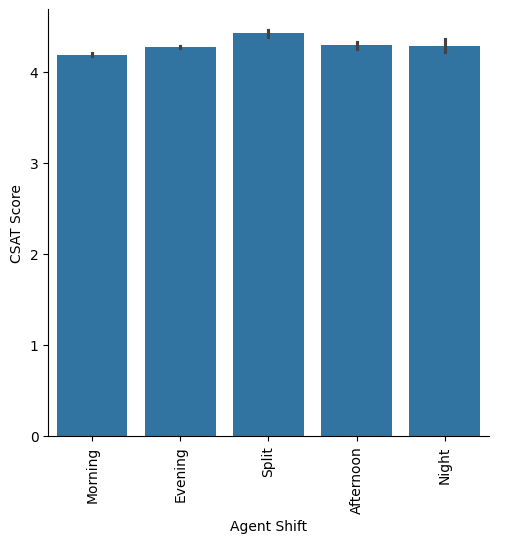

In [ ]:
sns.catplot(data=CS_data, x="Agent Shift", y="CSAT Score", kind="bar")
plt.xticks(rotation=90)
plt.show()

В целом, анализ признаков дал нам некоторую информацию о возможных способах преобразования категориальных переменных, чем мы сейчас и займемся. Для более детального анализа влияния атрибутов на целевую переменную в данном случае понадобится дополнительный анализ. Его мы освоим в одной из следующих работ.

Укрупнение категорий

При преобразовании категориальных данных основной проблемой зачастую является то, что при кодировании атрибута с большим количеством значений по методу One-Hot в результате может получиться слишком много столбцов, что вредно как для потенциального переобучения модели, так и не очень эффективно с плане вычислительных ресурсов.

Поэтому при возможности можно постараться укрупнить категории, то есть объединить близкие по смыслу значения атрибута. Посмотрим, например, на отзывы клиента. При анализе мы уже пришли к выводу, что если отзыв присутствует, то он скорее всего положительный. Поэтому можно бинаризировать этот атрибут - если отзыв есть, ставим 1, если нет - 0:



In [ ]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

Точно также можно бинаризировать и наличие заказа:



In [ ]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

А вот с другими категориальными переменным так просто уже не поступишь. Например, подкатегория обращения. Здесь мы видим большое количество малопопулярных значений. Часто в такой ситуации можно объединить редкие значения в одно, "Иное". Можно сделать это, например, так:

In [ ]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

In [ ]:
CS_data["Sub-category"].value_counts()

,count
Sub-category,
Other,28872
Reverse Pickup Enquiry,22389
Return request,8523
Delayed,7388
Order status enquiry,6922
Installation/demo,4116
Fraudulent User,4108
Product Specific Information,3589


Добавление агрегированной информации

При работе с категориальными переменными с большим количеством значений часто бывает полезно рассмотреть добавление агрегированной информации к данным вместо самой категориальной переменной. Например, можно вместо имени оператора технической поддержки добавить колонку, отражающую загруженность данного оператора. Вполне логично выдвинуть гипотезу о том, что загруженность оператора влияет на качество его работы и, как следствие, на удовлетворенность клиентов.

Можно вывести информацию о количестве записей в колонке, сгруппированных по имени оператора:



In [ ]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


Это информация нам нужна для проверки предположения о том, что у операторов существенно различается загрузка.

А для того, чтобы добавить колонку с количеством клиентов у соответствующего операторам можно вот так скомбинировать несколько функций pandas:



In [ ]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

CS_data.head()

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count
Unique id,,,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Other,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,...,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0,42
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,...,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0,32
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,...,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0,35
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,...,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0,48
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Other,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,...,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0,124


Точно так же можно поступить и с количеством операторов у одного руководителя. Но теперь нам понадобится другая агрегирующая функция, так как значения имени оператора могут повторяться:



In [ ]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})[:10]

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


По аналогии можем добавить эту информацию к исходному датасету:

In [ ]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

Заполнение отсутствующих значений

В отличие от численных атрибутов, заполнение пропусков в категориальных переменных значительно проще. В большинстве случаев наиболее адекватным будет заполнение неизвестных значений специальным:

In [ ]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

Хотя, в некоторых случаях, применяют и заполнение модой, то есть самым распространенным значением. Эффективность конкретных способов нужно оценивать исходя из их влияния на метрики эффективности моделей.

В данном примере еще требуется заполнить пропуски в численном поле. Просто проиллюстрируем, что в особых случаях, численные переменные тоже можно заполнять специальными значениями:



In [ ]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

Преобразование бинарных атрибутов

Для иллюстрации методов преобразования категориальных переменных в численные нам больше подойдет второй датасет, прилагающийся к данной работе - Титаник. Подробное описание этого уже хорошо известного нам набора мы опустим. Важно, что он содержит категориальные переменные всех интересующих нас типов шкал.

Начнем с самого простого типа категориальных атрибутов - бинарных. Их можно преобразовывать как угодно. Самый компактный способ - LabelEncoder:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

In [ ]:
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,third,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,third,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,third,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Преобразование порядковых атрибутов

Порядковые атрибуты, то есть такие, значения которых можно сравнивать друг с другом, чаще всего приходится заменять с помощью вручную составленного словаря, чтобы соблюсти естественный порядок значений. Рассмотрим, например, класс обслуживания на Титанике. Его можно закодировать так:



In [ ]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

T_data.head()

<ipython-input-199-b85e23fb0c3d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  T_data.Pclass.replace({
<ipython-input-199-b85e23fb0c3d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T_data.Pclass.replace({


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Преобразование номинальных атрибутов

Номинальные атрибуты, к которым относится большинство категориальных, можно преобразовывать только с использованием OneHotEncoder. Этот способ кодирования следует выбирать в случае сомнений в типе шкалы атрибута. Продемонстрируем работу этого кодировщика:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

OH_embarked.get_feature_names_out(['Embarked'])

dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)

dummies

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


На данном примере достаточно очевидна схема работы этого кодировщика. Они преобразует одну колонку с множеством значений в множество колонок с бинарными значениями.

В этом виде они готовы к объединению с исходным датафреймом:



In [ ]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

T_dummies.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,NaN,NaN,NaN,NaN
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,NaN,NaN,NaN,NaN
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,NaN,NaN,NaN,NaN,NaN


Удаление лишних столбцов и массовое преобразование

Для финализации процедуры подготовки категориальных данных вернемся к первому датасету. На примере Титаника мы познакомились с подробным алгоритмом работы кодировщика OneHotEncoder. Из-за его универсальности, его часто применяют массово, на всех категориальных атрибутах, независимо от типа. Именно для этого в pandas и существует функция get_dummies().

Но перед ее применением необходимо сначала удалить из датасета все ненужные колонки, особенно категориальные. После преобразования это будет сделать уже не так просто. Мы сейчас удалим все лишние атрибуты произвольно. На практике для этого можно использовать анализ значимости атрибутов.



In [ ]:
CS_data = CS_data.reset_index(drop=True)
CS_dropped = CS_data.drop([
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [ ]:
CS_dropped

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
0,Outcall,Product Queries,unknown,0,Jennifer Nguyen,On Job Training,Morning,5,0,0,42,41
1,Outcall,Product Queries,unknown,0,Michael Lee,>90,Morning,5,0,0,32,17
2,Inbound,Order Related,unknown,0,William Kim,On Job Training,Evening,5,0,0,35,46
3,Inbound,Returns,unknown,0,John Smith,>90,Evening,5,0,0,48,28
4,Inbound,Cancellation,unknown,0,Michael Lee,0-30,Morning,5,0,0,124,29
...,...,...,...,...,...,...,...,...,...,...,...,...
85902,Inbound,Refund Related,unknown,0,William Kim,On Job Training,Morning,4,0,0,128,31
85903,Inbound,Order Related,unknown,0,Emily Chen,>90,Morning,5,1,0,75,50
85904,Inbound,Order Related,unknown,0,Olivia Tan,On Job Training,Evening,5,1,0,31,41
85905,Inbound,Feedback,unknown,0,Olivia Tan,>90,Morning,4,0,0,48,44


Перед массовым преобразованием рекомендуем вывести основную статистику по категориальным колонкам еще раз, чтобы убедиться, что в датасете не осталось атрибутов с большим количеством значений:



In [ ]:
CS_dropped.describe()

,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
count,85907.000000,85907.000000,85907.000000,85907.000000,85907.000000
mean,4.242157,0.319008,0.212230,82.733433,41.358690
std,1.378903,0.466095,0.408889,47.494745,15.862947
min,1.000000,0.000000,0.000000,20.000000,5.000000
25%,4.000000,0.000000,0.000000,53.000000,29.000000
50%,5.000000,0.000000,0.000000,75.000000,41.000000
75%,5.000000,1.000000,0.000000,102.000000,55.000000
max,5.000000,1.000000,1.000000,429.000000,70.000000


Зодно проверим, что заполнены либо удалены все пропуски в данных.



In [ ]:
CS_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   channel_name             85907 non-null  object
 1   category                 85907 non-null  object
 2   Product_category         85907 non-null  object
 3   connected_handling_time  85907 non-null  object
 4   Manager                  85907 non-null  object
 5   Tenure Bucket            85907 non-null  object
 6   Agent Shift              85907 non-null  object
 7   CSAT Score               85907 non-null  int64 
 8   Customer Remarks New     85907 non-null  int64 
 9   Is_order                 85907 non-null  int64 
 10  Agent_count              85907 non-null  int64 
 11  Sups_no_agents           85907 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 7.9+ MB


In [ ]:
CS_dummies = pd.get_dummies(CS_dropped)

In [ ]:
CS_dummies.shape

(85907, 258)

### Задания для самостоятельного выполнения

#### Задание 1
Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

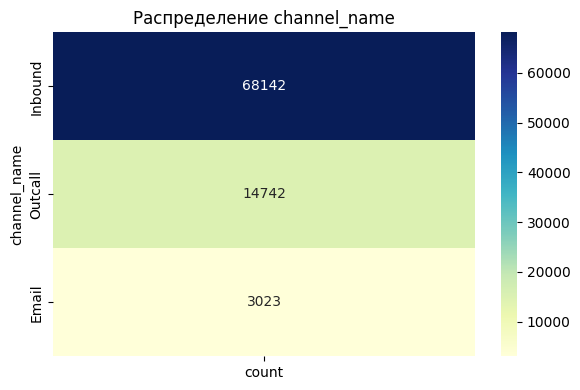

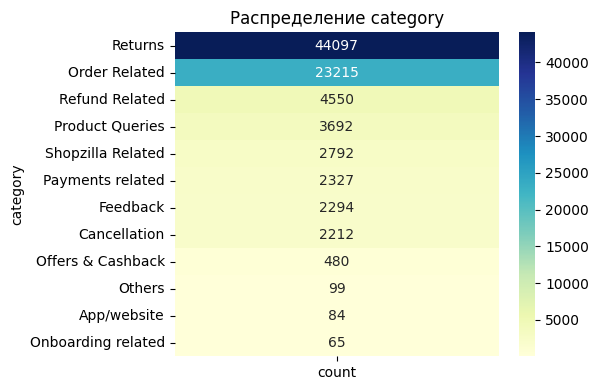

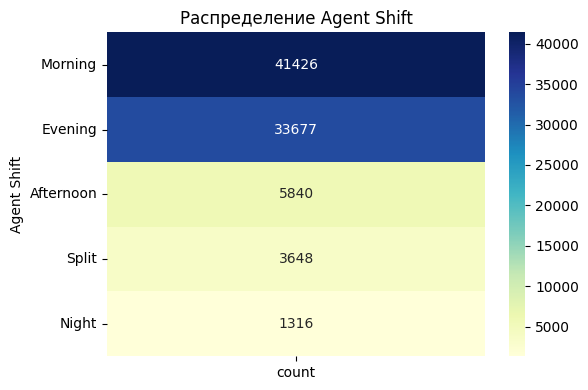

In [ ]:
CS_data = pd.read_csv('Customer_support_data.csv', index_col=0)

cat_cols = ['channel_name', 'category', 'Agent Shift']
for col in cat_cols:
    counts = CS_data[col].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(6, 4))
    sns.heatmap(pd.DataFrame(counts), annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Распределение {col}')
    plt.tight_layout()
    plt.show()

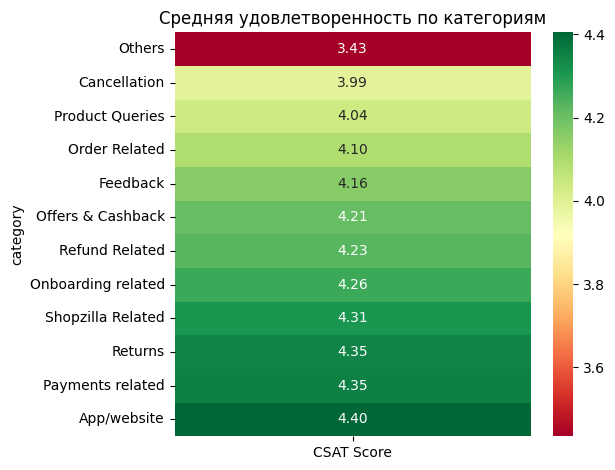

In [ ]:
pivot = CS_data.pivot_table(index='category', values='CSAT Score', aggfunc='mean').sort_values('CSAT Score')
sns.heatmap(pivot, annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Средняя удовлетворенность по категориям')
plt.tight_layout()
plt.show()

#### Задание 2
Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

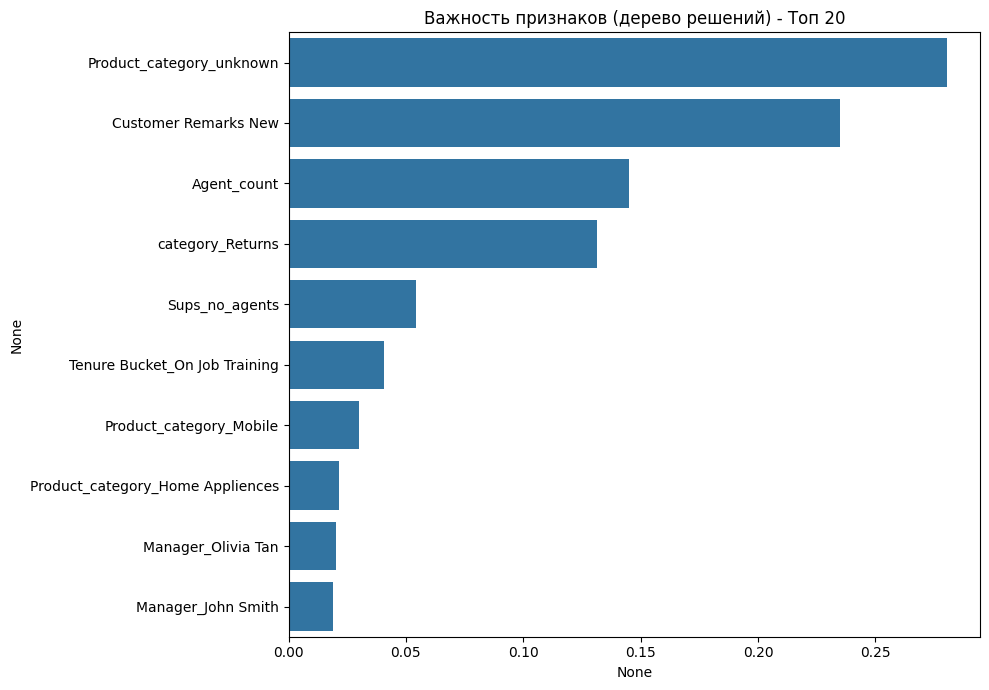

In [ ]:
X = CS_dummies.drop(['CSAT Score'], axis=1)
y = CS_dummies['CSAT Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
top_20_importances = importances[:10]

plt.figure(figsize=(10, 7))
sns.barplot(x=top_20_importances, y=top_20_importances.index)
plt.title('Важность признаков (дерево решений) - Топ 20')
plt.tight_layout()
plt.show()

#### Задание 3
Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_raw)

X_train = pd.DataFrame(encoder.transform(X_train_raw), columns=encoder.get_feature_names_out(), index=X_train_raw.index)
X_test = pd.DataFrame(encoder.transform(X_test_raw), columns=encoder.get_feature_names_out(), index=X_test_raw.index)

In [ ]:
X_train_raw

,Customer Remarks New,Is_order,Agent_count,Sups_no_agents,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,category_Feedback,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
5056,0,0,72,17,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
43070,0,1,119,25,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
70807,0,0,99,42,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
24015,1,0,56,39,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
20160,1,0,25,68,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1,1,87,42,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
54886,1,0,45,44,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
76820,1,0,118,19,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
860,1,0,64,55,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False


#### Задание 4
Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.


In [ ]:
titanic = pd.read_csv('titanic.csv', index_col=0)

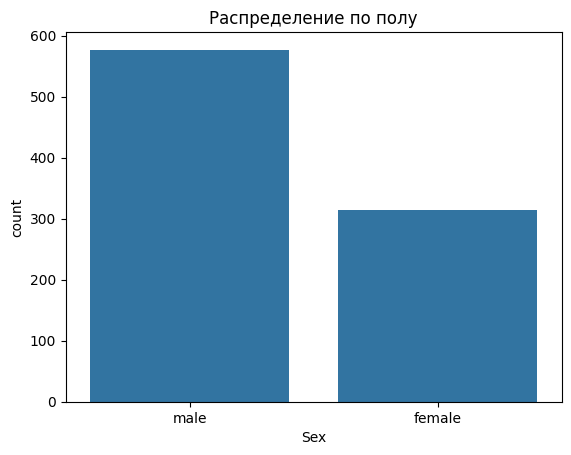

In [ ]:
sns.countplot(x='Sex', data=titanic)
plt.title("Распределение по полу")
plt.show()

Мужчин — почти в двое больше, чем женщин.

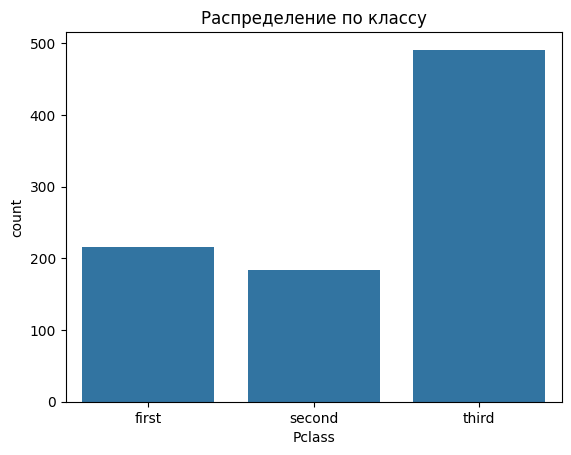

In [ ]:
sns.countplot(x='Pclass', data=titanic, order=['first', 'second', 'third'])
plt.title("Распределение по классу")
plt.show()

Большинство пассажиров — из 3-го класса.

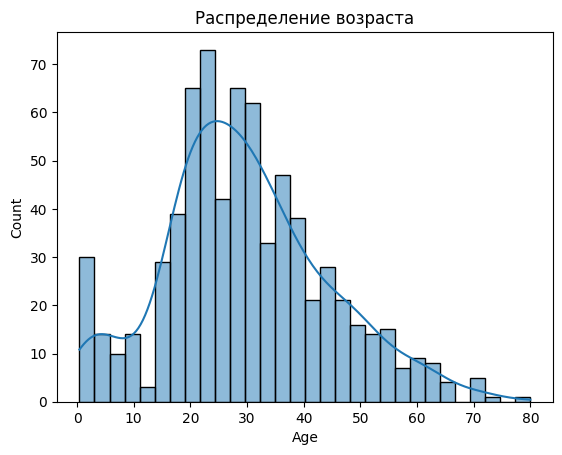

In [ ]:
sns.histplot(titanic['Age'].dropna(), kde=True, bins=30)
plt.title("Распределение возраста")
plt.xlabel("Age")
plt.show()

Пик в районе 20–30 лет.

Есть и дети, и пожилые.

Распределение немного скошено влево (много молодых).

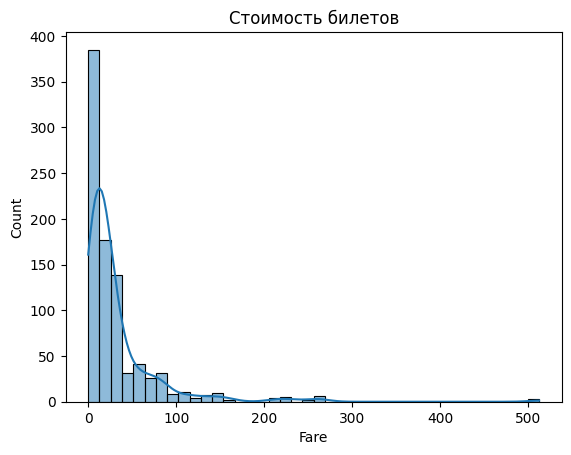

In [ ]:
sns.histplot(titanic['Fare'], kde=True, bins=40)
plt.title("Стоимость билетов")
plt.xlabel("Fare")
plt.show()

Большинство билетов стоят до 50.

Есть высокие выбросы — некоторые пассажиры платили > 500.

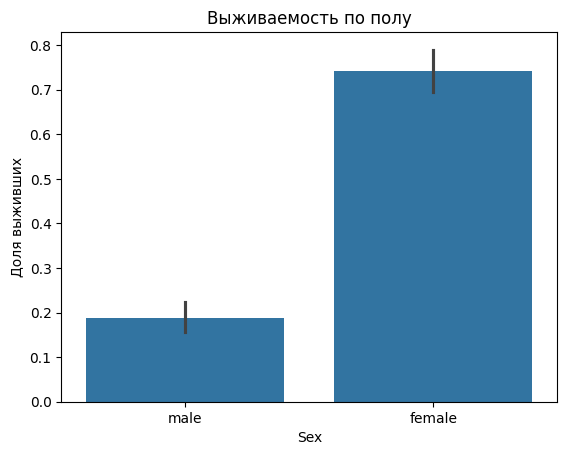

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title("Выживаемость по полу")
plt.ylabel("Доля выживших")
plt.show()

Женщины выживали значительно чаще (почти 75%).

У мужчин выживаемость < 20%.

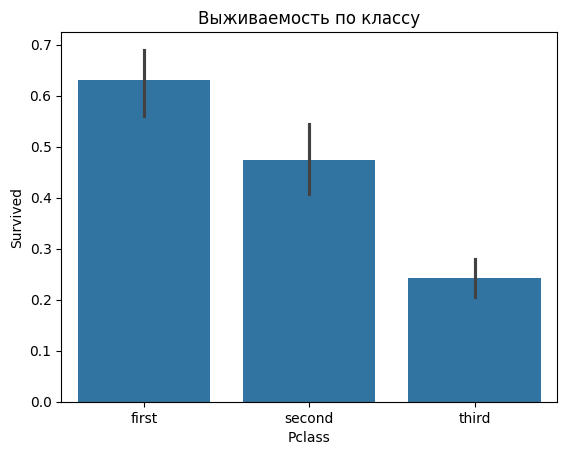

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic, order=['first', 'second', 'third'])
plt.title("Выживаемость по классу")
plt.show()


В 1-м классе выжило больше половины пассажиров.

В 3-м — только около 25%.

<ipython-input-255-f7ed2fa3b844>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=titanic[titanic['Survived']==1]['Age'].dropna(), label='Выжившие', shade=True)
<ipython-input-255-f7ed2fa3b844>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=titanic[titanic['Survived']==0]['Age'].dropna(), label='Не выжившие', shade=True)


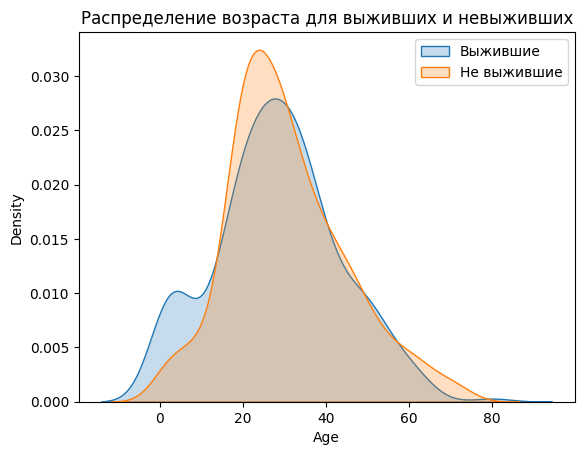

In [ ]:
sns.kdeplot(data=titanic[titanic['Survived']==1]['Age'].dropna(), label='Выжившие', shade=True)
sns.kdeplot(data=titanic[titanic['Survived']==0]['Age'].dropna(), label='Не выжившие', shade=True)
plt.legend()
plt.title("Распределение возраста для выживших и невыживших")
plt.show()


In [ ]:
titanic.drop(columns=['Cabin'], inplace=True)

In [ ]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

<ipython-input-260-85422144bae8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
<ipython-input-260-85422144bae8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# ЛР 5.4 - Работа с целевой переменной

### Цель работы

Познакомиться с основными приемами обработки данных в отношении к целевой переменной: дискретизация, отбор признаков, устранение дисбаланса классов.


### Содержание работы

1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.
2. Постройте простую модель регрессии и оцените ее качество.
3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.
4. Постройте модель на оставшихся данных и оцените ее качество.
5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.
6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.
7. Загрузите датасет для классификации. Постройте распределение целевой переменной.
8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.
9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.
10. Выравняйте распределение классов путем оверсемплинга с повторением

### Выполнение

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression, LogisticRegression

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

Для первого примера мы возьмем датасет mtp, содержащий фармокологические данные. Этот датасет подходит для наших целей: в нем довольно много признаков, не все из которых очень показательны для значения целевой переменной. Кроме названия следует указать версию датасета:



In [ ]:
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


Давайте построим распределение целевой переменной:



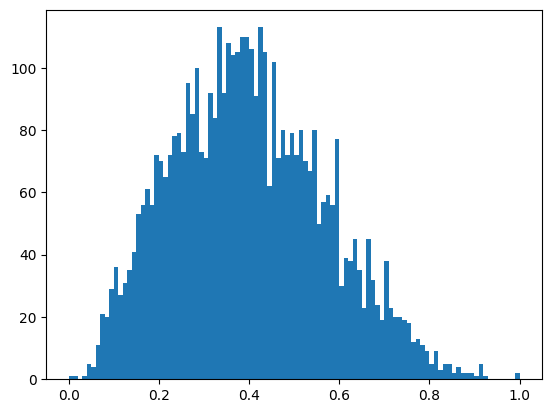

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

Мы видим, что целевая переменная представляет собой численное значение, что определяет задачу моделирования как регрессию. Кроме того, график показывает, что распределение имеет форму, сходную с нормальным:



Построение базовой (baseline) модели

Такая модель позволяет выбрать те способы изменения исходного датасета, которые увеличивают его предсказательную силу, то есть работают на увеличение точности моделей. Именно с бейзлайном мы будем сравнивать эффективность моделей после преобразования данных.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

В качестве базовой модели лучше выбрать простую (вычислительно) модель, которая, желательно, обладает высокой интерпретируемостью. Для этого лучше всего подходят линейные модели и деревья решений. В данном случае, воспользуемся моделью линейной регрессии:

In [ ]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340762242646

Самая простая модель уже "переобучается" на наших данных. Это происходит потому, что в данных очень много признаков, каждый их которых добавляет одну степень свободы модели (добавляет один обучаемый коэффициент), что увеличивает её сложность. При этом далеко не все эти признаки нужны для предсказания значения целевой переменной. Как правило, при большом количестве признаков, большинство не несет полезной информации.

Определение относительной важности признаков

Для улучшения работы модели нам нужно избавиться от неинформативных, лишних признаков в датасете. В данном примере мы используем даже не отдельное дерево, которое может очень сильно переобучиться на нашей выборке, а его более сильную и робастную ансамблевую версию - случайный лес:

Text(0.5, 0, 'Feature Importance')

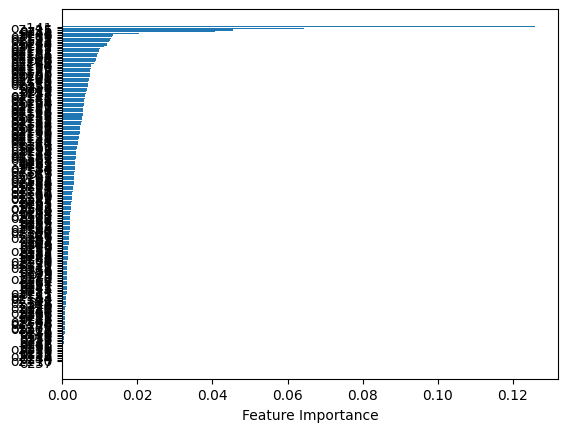

In [ ]:
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

Самые значимые признаки:

In [ ]:
rf.feature_importances_[sort][-10:]

array([0.01248972, 0.01285001, 0.01285948, 0.01320202, 0.01351323,
       0.02048736, 0.04059602, 0.0455345 , 0.06445439, 0.12579924])

In [ ]:
df.data.columns[sort][-10:]

Index(['oz47', 'oz112', 'oz195', 'oz153', 'oz109', 'oz18', 'oz48', 'oz35',
       'oz15', 'oz141'],
      dtype='object')

Теперь мы можем использовать эту информацию для удаления лишних данных из датасета. Мы сейчас возьмем 20:

In [ ]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz8,oz198,oz104,oz155,oz158,oz157,oz162,oz137,oz197,oz20,oz47,oz112,oz195,oz153,oz109,oz18,oz48,oz35,oz15,oz141
0,0.060606,0.039213,0.000531,0.752291,0.800120,0.000000,0.319206,0.000000,0.505899,0.000000,0.102941,0.000000,0.056880,0.052296,0.076923,0.0625,0.312855,0.0,0.000000,0.041308
1,0.373737,0.326584,0.146390,0.745984,0.791224,0.000281,0.306084,0.278945,0.683820,0.242424,0.389706,0.222222,0.287438,0.060922,0.153846,0.0625,0.297041,0.4,0.282828,0.212274
2,0.212121,0.204885,0.210488,0.753298,0.798276,0.001852,0.406309,0.000000,0.499219,0.388889,0.257353,0.000000,0.117431,0.072628,0.076923,0.1250,0.288557,0.0,0.388889,0.063643
3,0.171717,0.023469,0.077627,0.767469,0.800965,0.000158,0.327848,0.039437,0.630533,0.095238,0.198529,0.000000,0.145349,0.054593,0.076923,0.0000,0.310692,0.1,0.111111,0.031193
4,0.101010,0.111398,0.052549,0.741548,0.802893,0.000037,0.329857,0.000000,0.516053,0.260870,0.154412,0.000000,0.067583,0.045400,0.076923,0.0625,0.286581,0.0,0.304348,0.063643


Мы используем тот же класс моделей - линейную регрессию - чтобы различия в метрике были сопоставимы. И мы получаем гораздо более качественную модель. Метрика уже положительна, что свидетельствует о большом росте точности:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.39814476005462185

Регрессия еще далека от идеала, но уже значительно лучше случайности и показывает некоторый уровень эффективности, который может быть приемлемым в зависимости от прикладной задачи.

Автоматизация отбора признаков

Конечно, отбор признаков - это довольно стандартная процедура при моделировании. В предыдущем примере мы все делали руками. Однако, в библиотеке sklearn есть встроенные средства выбора признаков.

Давайте напомним себе о форме датасета:



In [ ]:
df.data.shape

(4450, 202)

Исходно у нас присутствует 202 признака. В sklearn есть специальный объект, SelectFromModel.



In [ ]:
sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 53)

У нас осталось 55 признаков. Это больше, чем мы использовали в прошлый раз. Решение об этом принимает сам алгоритм SelectFromModel. Его, конечно, тоже можно настроить. Но сейчас давайте проверим, как данная обработка скажется на эффективности модели. Для этого построим уже третью модель на этом датасете:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.4374460118689293

Устранение дисбаланса классов

Одна из самых частых проблем при построении моделей классификации на реальных данных - дисбаланс классов. Это ситуация, когда в датасете присутствует очень разное количество объектов, принадлежащих разным классам. Другими словами, это неравномерность распределения значений целевой переменной. При этом проблемой такой дисбаланс становится, когда объектов одного класса в несколько раз, а то и десятков раз больше чем другого. На практике, соотношение, например, 100 к 1 не является редкостью.

Давайте обратимся к примеру. Возьмем датасет результатов психологического моделирования:

In [ ]:
df = fetch_openml("balance-scale", version=1)

df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


визуализируем распределение целевой переменной:



<Axes: xlabel='class', ylabel='Count'>

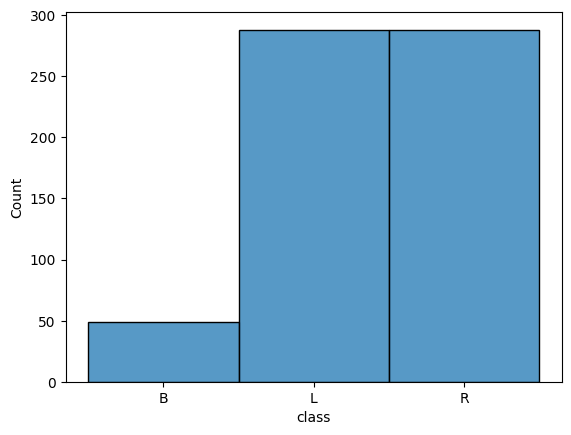

In [ ]:
sns.histplot(data=df.target.to_frame(), x="class")

Базовая модель:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [ ]:
print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



Фактически, модель вообще ни разу не распознала правильно объект миноритарного класса. Поэтому невзвешенная оценка качества модели на самом деле ближе к отметке в 60%. Это не очень удовлетворительный результат.

In [ ]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


Главная проблема дисбаланса классов в том, что модель недостаточно учитывает объекты миноритарных классов. Можно относительно просто это исправить, при обучении модели, придав больший "вес" таким редким объектам. Это называется, взвешивание классов. Для начала надо рассчитать "важность" или вес класса, который будет обратно пропорционален его доле в выборке.

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

Мы видим, что вес миноритарного класса действительно вильно больше, чем двух других. Эту информацию можно передать непосредственно модели машинного обучения через параметр конструктора:

In [ ]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [ ]:
print(classification_report(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



Такая модель будет сильнее изменять свои веса в ответ на объект миноритарного класса, пропорционально весу этого класса. На самом деле все немного сложнее, так как обучение идет методом пакетного градиентного спуска, в котором на каждом шаге обрабатывается несколько объектов выборки, но смысл именно в этом.



Oversampling

Но что делать, если конкретная модель не поддерживает взвешивание классов? Или по какой-то другой причине, такой способ либо не подходит, либо не дает нужного эффекта? Можно использовать ресемплинг - то есть случайную выборку из исходного датасета с выравниванием распределения по классам. Есть две стратегии. Оверсемплинг - это когда мы семплируем в выборку больше объектов мажоритарного класса с повторениями. Андерсемплинг - это исключение случайных объектов мажоритарных классов до выравнивания распределения. Есть гибридный подход - когда мы делаем и то и другое в определенных пропорциях. Кроме того, есть продвинутые техники генерации или аугментации данных для выравнивания распределения

In [ ]:
y_train.value_counts()

,count
class,
R,216
L,215
B,37


Теперь мы семплируем недостающее количество объектов миноритарного класса из нашего датасета с повторениями. После этого нам остается только объединить эту новую выборку с исходной:





In [ ]:
X_train["target"] = y_train

oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


<Axes: xlabel='target', ylabel='Count'>

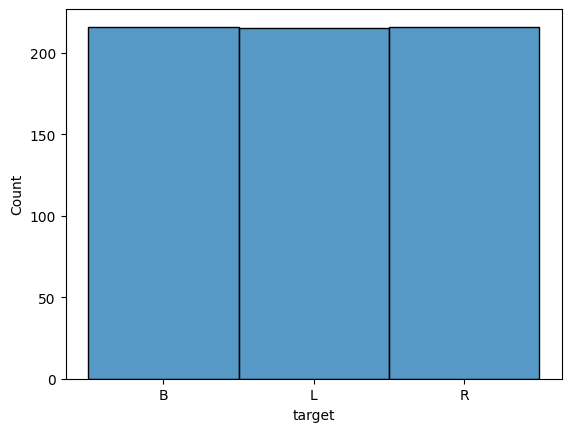

In [ ]:
sns.histplot(data=oversampled, x="target")

мы просто добавили в обучающую выборку дубликаты объектов миноритарного класса в нужном объеме. В итоге, по задумке этого метода, при обучении модель будет чаще видеть такие объекты (пусть одни и те же) и будет подстраивать свои веса под них в том же темпе, что и под объекты мажоритарных классов. Проверим это. Опять разделим датафрейм на матрицу признаков и целевой вектор:



In [ ]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [ ]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

При оценке качества этой модели получаем такую же картину, что и после взвешивания. Данные стратегии производят очень схожий эффект на процесс обучения модели.

In [ ]:
print(classification_report(y_test, OSmodel.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



Дискретизация целевой переменной

Для освоения следующего приема обработки данных воспользуемся другим датасетом, но из того же репозитория. После чтения сразу подготовим его к моделированию:



In [ ]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

<ipython-input-43-fe69465c1096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


Распределение целевой переменной:



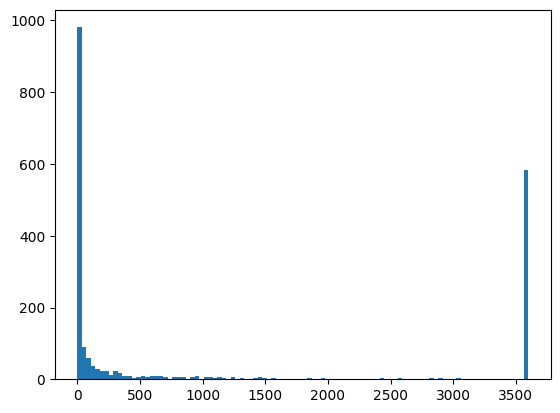

In [ ]:
plt.hist(df.target, 100)
_ = plt.plot()

Мы видим, что целевая переменная имеет численный вид (то есть перед нами проблема регрессии), и при этом, распределена очень неравномерно.

Это не красивое около-нормальное распределение из предыдущего примера. Это очень очень несбалансированное двухмодальное распределение. Есть большое количество объектов в датасете, у которых значение целевой переменной близко к 0, чуть меньшее, но тоже большое количество объектов, у которых оно близко к максимальному (порядка 3 500), и очень мало объектов с промежуточными значениями.

Проблема сходная с дисбалансом классов, но для регрессии.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

Мы можем исправить неравномерность распределения разными способами, среди которых также ресемплирование выборки, как и в случае с классификацией. Но здесь покажем другой подход - дискретизацию целевой переменной. Этот способ заключается в том, что мы объединяем значения целевой переменной в категории - bins - поэтому такой способ часто называют биннинг.

Группировать объекты можно опять же по-разному. Для автоматизации этой процедуры в библиотеке sklearn есть специальный объект - KBinsDiscretizer

In [ ]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))
y_binned

array([[4.],
       [0.],
       [4.],
       ...,
       [0.],
       [0.],
       [4.]])

<Axes: ylabel='Count'>

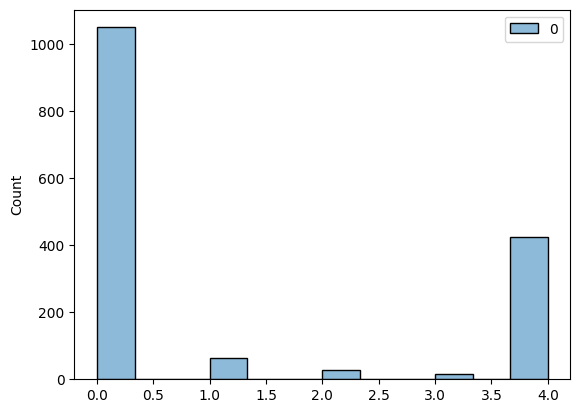

In [ ]:
sns.histplot(data=pd.DataFrame(y_binned))

Естественно, так как мы используем равномерные диапазоны, в крайних поддиапазонах соберутся большинство объектов выборки. Мы это видим на графике - столбцы укрупнились, но неравномерность распределения никуда не делась. В случае таких сильно неравномерных распределений нам больше подойдет другая стратегия - квантильная дискретизация, при которой длина диапазонов выбирается таким образом, чтобы в каждом из них оказалось примерно по одинаковому количеству объектов выборки:



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


<Axes: ylabel='Count'>

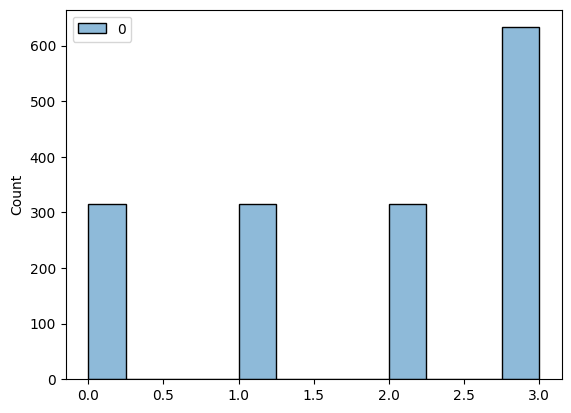

In [ ]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))

sns.histplot(data=pd.DataFrame(y_binned))

### Задания для самостоятельного выполнения

#### Задание 1
Исследуйте связь между количеством самых важных признаков, которые использует модель для обучения и тестовой точностью получившейся модели. Обучите несколько моделей с разным количеством наиболее важных признаков. Постройте график зависимости точности модели от количества признаков. Сделайте вывод.


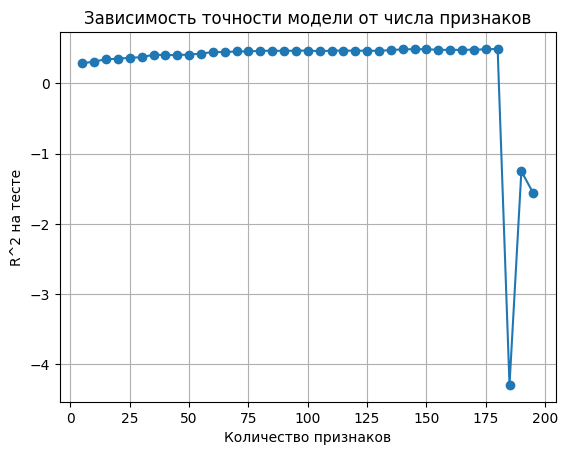

In [ ]:
df = fetch_openml("mtp", version=1)
X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Модель случайного леса для определения важности признаков
rf = RandomForestRegressor(n_estimators=15, random_state=42)
rf.fit(X_train, y_train)

# Сортировка признаков по важности
importances = rf.feature_importances_
indices = np.argsort(importances)

scores = []
num_features = list(range(5, 200, 5))

# Обучение модели для разного числа признаков
for n in num_features:
    selected = X.columns[indices][-n:]  # n самых важных признаков
    X_sel = X[selected]
    X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_sel, y, test_size=0.25, random_state=42)
    model = LinearRegression()
    model.fit(X_train_sel, y_train)
    scores.append(model.score(X_test_sel, y_test))

# График зависимости
plt.plot(num_features, scores, marker='o')
plt.title("Зависимость точности модели от числа признаков")
plt.xlabel("Количество признаков")
plt.ylabel("R^2 на тесте")
plt.grid(True)
plt.show()


#### Задание 2
Используйте другие методы отбора признаков:
* Исключение низкодисперсных признаков;
* Исключение по парным стаистическим критериям (хи-квадрат, тест Фишера, коэффициент корреляции, информационный критерий);
* Рекурсивное исключение признаков;
* Последовательное включение признаков;
* Исключение по L1-норме (гребневой регрессии).


Исключение низкодисперсных признаков

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_lowvar = selector.fit_transform(X)

print("Число признаков после исключения низкодисперсных:", X_lowvar.shape[1])


Число признаков после исключения низкодисперсных: 133


Корреляция с целевой переменной

In [ ]:
correlations = X.corrwith(y).abs()
top_corr = correlations.sort_values(ascending=False).head(20)
print("Топ-20 признаков по корреляции:\n", top_corr)

Топ-20 признаков по корреляции:
 oz35     0.412826
oz109    0.352005
oz141    0.351449
oz18     0.339286
oz137    0.310163
oz52     0.306650
oz84     0.306587
oz98     0.306587
oz114    0.301155
oz46     0.299914
oz47     0.293251
oz12     0.289708
oz39     0.289036
oz6      0.284567
oz50     0.282807
oz45     0.282508
oz80     0.281765
oz82     0.281765
oz29     0.274465
oz42     0.274394
dtype: float64


Рекурсивное исключение признаков

In [ ]:
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=20)
X_rfe = rfe.fit_transform(X, y)
print("Признаков после RFE:", X_rfe.shape[1])

Признаков после RFE: 20


Последовательное включение признаков

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(lr, n_features_to_select=20, direction='forward')
X_sfs = sfs.fit_transform(X, y)
print("Признаков после SFS:", X_sfs.shape[1])

Признаков после SFS: 20


Отбор с L1-регуляризацией

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)
selected_l1 = np.sum(lasso.coef_ != 0)
print("Признаков после L1 (Lasso):", selected_l1)

Признаков после L1 (Lasso): 22


#### Задание 3
Изучите возможности библиотеки imbalanced-learn. Примените на данном примере возможности данной библиотеки для оверсемплинга и андерсемплинга выборки.


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Загрузка
df = fetch_openml("balance-scale", version=1)
X, y = df.data, df.target

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# OverSampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_ros, y_ros)
y_pred = model.predict(X_test)
print("Oversampling:")
print(classification_report(y_test, y_pred))

# UnderSampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

model.fit(X_rus, y_rus)
y_pred = model.predict(X_test)
print("Undersampling:")
print(classification_report(y_test, y_pred))


Oversampling:
              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157

Undersampling:
              precision    recall  f1-score   support

           B       0.41      0.92      0.56        12
           L       0.98      0.81      0.89        73
           R       0.96      0.93      0.94        72

    accuracy                           0.87       157
   macro avg       0.78      0.89      0.80       157
weighted avg       0.93      0.87      0.89       157



#### Задание 4
Исследуйте влияние дискретизации целевой переменной на качество модели. Используйте уже продемострированный подход - построение базовой модели (baseline) и сравнение модели после обработки данных с базовой. Проверьте разное количество категорий, а также разные стратегии группировки. Сделайте выводы. Обратите внимание, что после биннинга целевой переменной она стала категориальной. А значит, задача превратилась в задачу классификации.


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

df = fetch_openml("CPMP-2015-regression", version=1)
X = pd.get_dummies(df.data.drop("instance_id", axis=1))
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Базовая модель
reg = LinearRegression()
reg.fit(X_train, y_train)
baseline_score = reg.score(X_test, y_test)
print("Baseline R2:", baseline_score)

# Дискретизация
for strategy in ["uniform", "quantile"]:
    for bins in [3, 5, 7]:
        binner = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
        y_train_b = binner.fit_transform(pd.DataFrame(y_train)).ravel()
        y_test_b = binner.transform(pd.DataFrame(y_test)).ravel()

        # Модель классификации
        clf = LogisticRegression(max_iter=1000)
        clf.fit(X_train, y_train_b)
        acc = accuracy_score(y_test_b, clf.predict(X_test))
        print(f"Strategy: {strategy}, Bins: {bins}, Accuracy: {acc:.3f}")


Baseline R2: 0.891977926998725
Strategy: uniform, Bins: 3, Accuracy: 0.943
Strategy: uniform, Bins: 5, Accuracy: 0.918
Strategy: uniform, Bins: 7, Accuracy: 0.898
Strategy: quantile, Bins: 3, Accuracy: 0.770
Strategy: quantile, Bins: 5, Accuracy: 0.670
Strategy: quantile, Bins: 7, Accuracy: 0.609
